### DCGAN - Deep Convolution Generative Adverserial Network

The Deep Convolution Generative Adverserial Network (DCGAN) is an architecture for learning to generate new content just like GAN, also, it consists of a generator and discriminator. The only difference here is that DCGAN uses convolutional layers in both the networks, generator and discriminator.


<img src="DCGAN Archii.jpeg",width=800,height=800>

(Fig. DCGAN Architecture)

The first layer in the Generator is a fully connected layer which is reshaped into a deep and narrow layer. Then we use batch normalization and a leaky ReLU activation. Next is a transposed convolution where we would halve the depth and double the width and height of the previous layer. Again, we use batch normalization and leaky ReLU. For each of these layers, the general scheme is Convolution > Batch Normalization > Leaky ReLU.

Discriminator is basically just a convolutional classifier. Use batch normalization on each layer except the first convolutional and output layers. Again, each layer looks something like Convolution > Batch Normalization > Leaky ReLU. So, it takes real or fake MNIST digits and applies a series of convolutions. Then we use a sigmoid to make sure our output can be interpreted as the probability the input image is a real MNIST character.



To read the original paper introducing DCGANs, click __[here](https://arxiv.org/abs/1511.06434)__.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D, Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU, ELU
from keras.optimizers import Adam
from keras.layers import Flatten, Dropout
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np
import sys

Using TensorFlow backend.


In [2]:
def generator(input_dim=100,units=1024,activation='relu'):  #Defining parameters for the generator
    
    model = Sequential()                                    #Linear stack of layers
    model.add(Dense(input_dim=input_dim, units=units))      #Fully connected layer (1024 Neurons) taking Noise as input
    model.add(BatchNormalization())                         #Normalize data to forward to the next linear layer
    model.add(Activation(activation))                       #Passing linear data to non-linear activation function relu
    model.add(Dense(128*7*7))                               #Adding the next fully connected dense layer (128 neurons)
    model.add(BatchNormalization())                         #Normalized data again so that it can be fed as input to next layer
    model.add(Activation(activation))                       
    model.add(Reshape((7, 7, 128), input_shape=(128*7*7,))) #Reshaping tensor to 7*7*128 so that we can upscale it
    model.add(UpSampling2D((2, 2)))                         #used to double the rows and columns of input tensor, 14*14 currently
    model.add(Conv2D(64, (5, 5), padding='same'))           #this layer creates kernel of (5x5) which is moving window
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(UpSampling2D((2, 2)))                         #Upsampled once again, 28*28 is the current required shape
    model.add(Conv2D(1, (5, 5), padding='same'))
    model.add(Activation('tanh'))                           #Final layer uses tanh to learn more quickly to saturate and cover the color space 
    print(model.summary())
    return model

def discriminator(input_shape=(28, 28, 1),nb_filter=64):    #Defined the input shape and Number of convolution filters to use.
    model = Sequential()                                    #Linear stack of layers
    model.add(Conv2D(nb_filter, (5, 5), strides=(2, 2),     #Adding convolution layer with (5x5) kernel
                     padding='same',input_shape=input_shape))
    model.add(BatchNormalization())                         #used to normalize the data as per the range of activation fn

    model.add(ELU())                                        #higher classification accuracies, gets rid of vanishing gradient prob
    model.add(Conv2D(2*nb_filter, (5, 5), strides=(2, 2)))
    model.add(BatchNormalization())                         #used to normalize the data as per the range of activation fn
    model.add(ELU())
    model.add(MaxPooling2D(pool_size=(2, 2)))               #it is used to down scale by factor (2,2)
    model.add(Flatten())                                    #Flattens the image in linear array
    model.add(Dense(4*nb_filter))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))                                 #used to prevent overfitting during training
    model.add(ELU())
    model.add(Dense(1))
    model.add(Activation('sigmoid'))                        #to get output as 0 or 1
    print(model.summary())
    return model

In [3]:
def combine_images(generated_images):
    total,width,height = generated_images.shape[:-1]
    cols = int(math.sqrt(total))
    rows = math.ceil(float(total)/cols)
    combined_image = np.zeros((height*rows, width*cols),
                              dtype=generated_images.dtype)

    for index, image in enumerate(generated_images):
        i = int(index/cols)
        j = index % cols
        combined_image[width*i:width*(i+1), height*j:height*(j+1)] = image[:, :, 0]
    return combined_image

def show_progress(e,i,g0,d0,g1,d1):
    sys.stdout.write("\repoch: %d, batch: %d, g_loss: %f, d_loss: %f, g_accuracy: %f, d_accuracy: %f" % (e,i,g0,d0,g1,d1))
    sys.stdout.flush()

In [4]:
import os
from keras.datasets import mnist
from PIL import Image
from keras.models import Sequential
from keras.optimizers import SGD, Adam
#from visualizer import *

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 1024)              103424    
_________________________________________________________________
batch_normalization_61 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_51 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 6272)              6428800   
_________________________________________________________________
batch_normalization_62 (Batc (None, 6272)              25088     
_________________________________________________________________
activation_52 (Activation)   (None, 6272)              0         
_________________________________________________________________
reshape_11 (Reshape)         (None, 7, 7, 128)         0         
__________

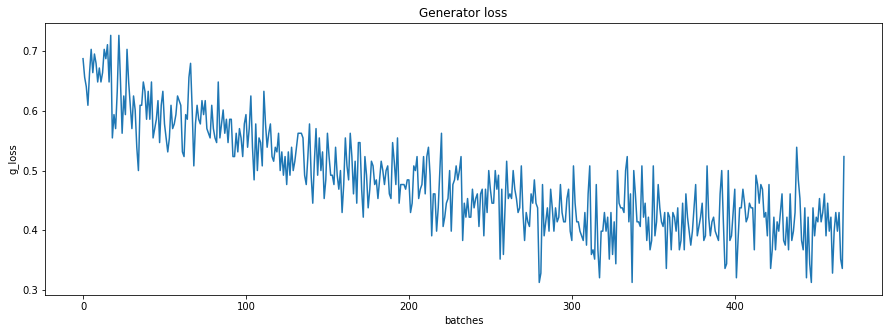

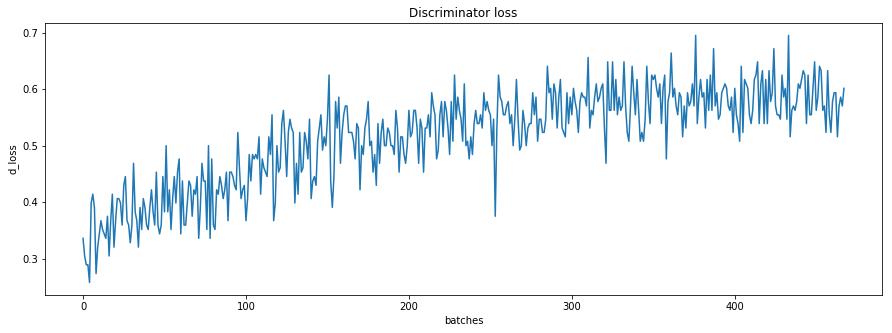


epoch: 2, batch: 467, g_loss: 0.944500, d_loss: 0.697295, g_accuracy: 0.328125, d_accuracy: 0.562500

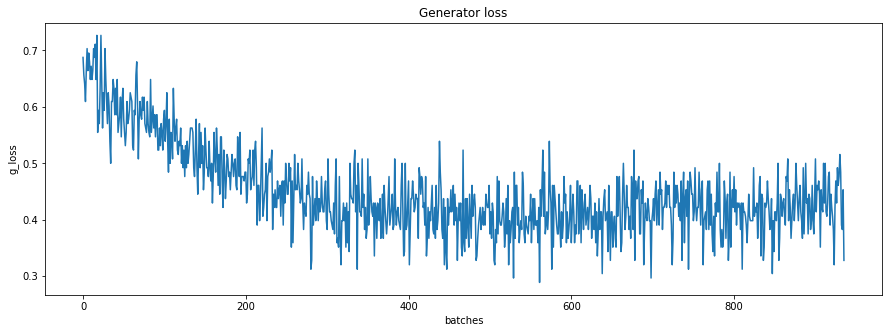

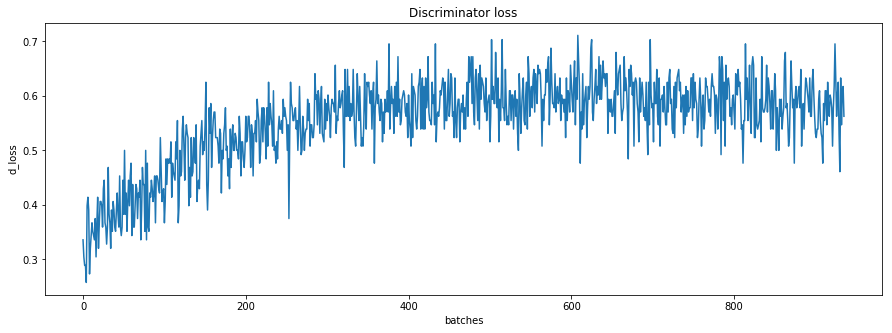


epoch: 3, batch: 467, g_loss: 0.796887, d_loss: 0.711227, g_accuracy: 0.437500, d_accuracy: 0.546875

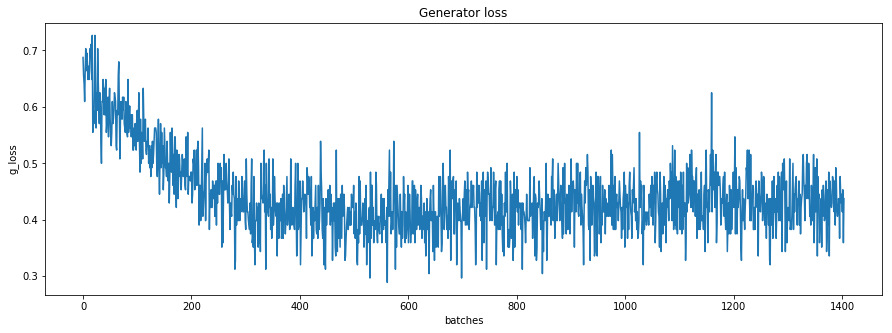

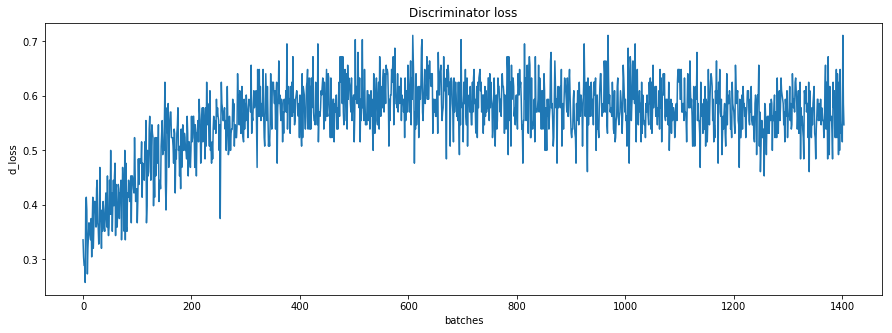


epoch: 4, batch: 467, g_loss: 0.807174, d_loss: 0.713883, g_accuracy: 0.390625, d_accuracy: 0.515625

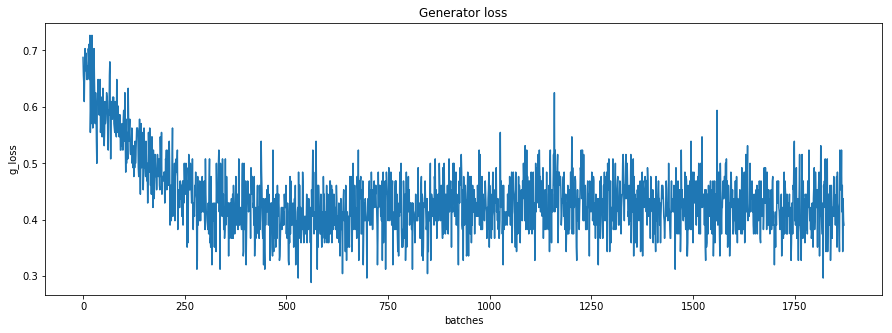

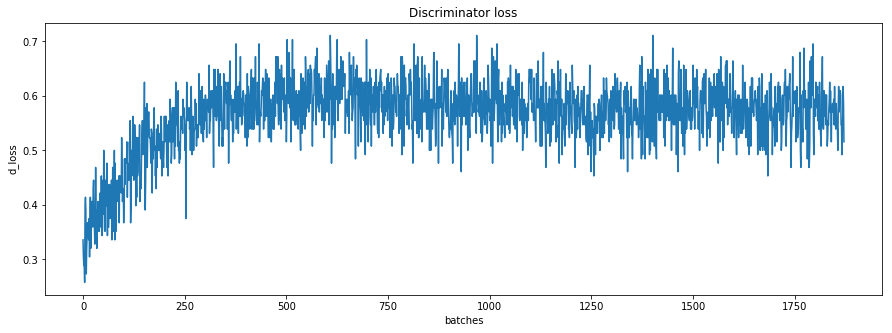


epoch: 5, batch: 467, g_loss: 0.806055, d_loss: 0.690535, g_accuracy: 0.398438, d_accuracy: 0.578125

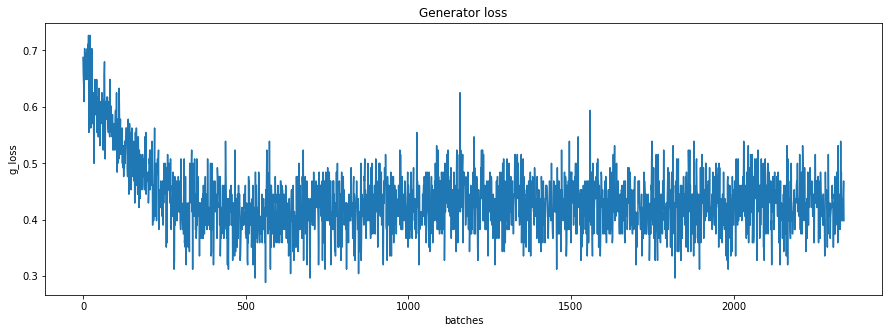

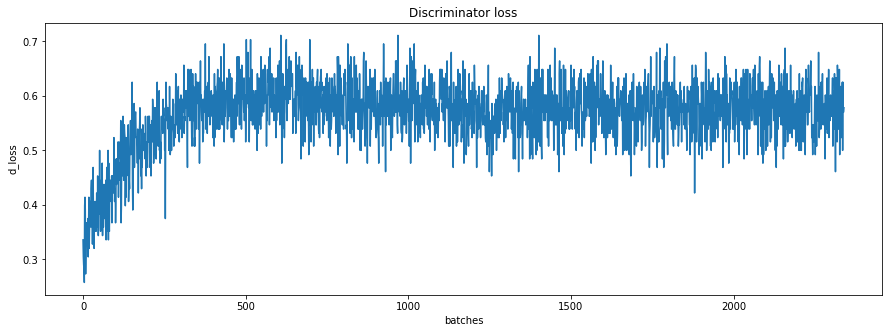


epoch: 6, batch: 467, g_loss: 0.799405, d_loss: 0.679081, g_accuracy: 0.398438, d_accuracy: 0.578125

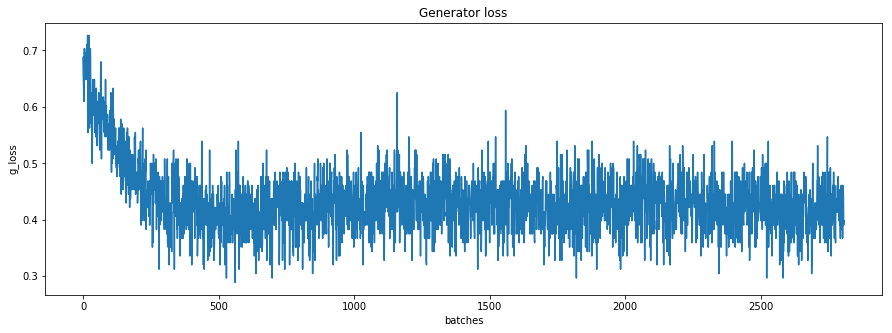

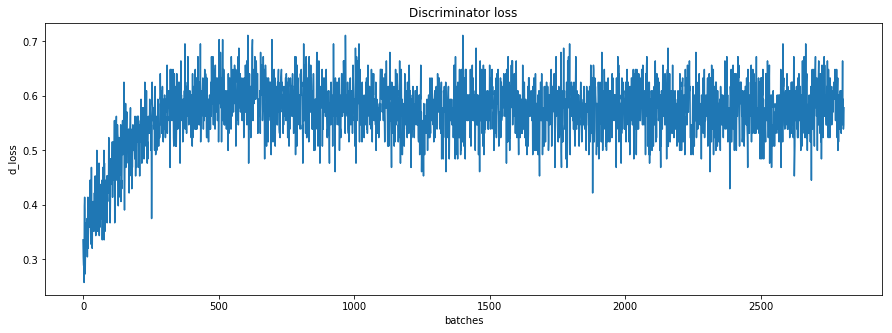


epoch: 7, batch: 467, g_loss: 0.791045, d_loss: 0.665867, g_accuracy: 0.398438, d_accuracy: 0.585938

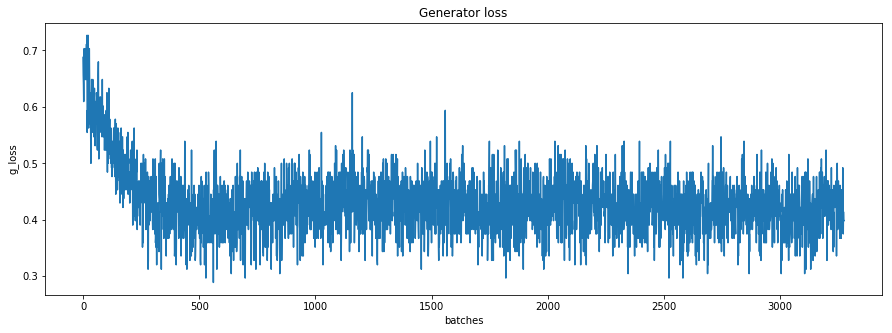

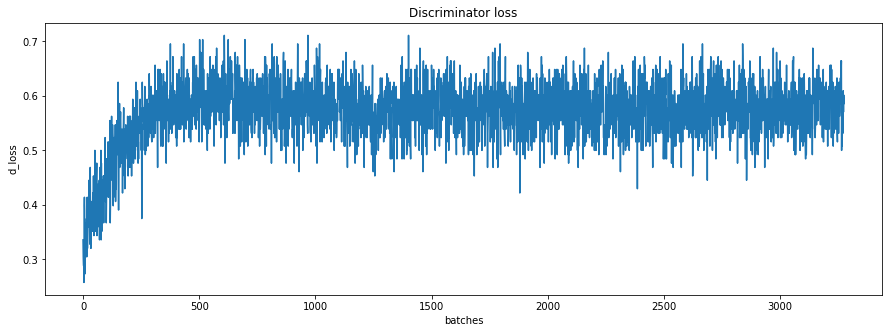


epoch: 8, batch: 467, g_loss: 0.775409, d_loss: 0.695086, g_accuracy: 0.390625, d_accuracy: 0.554688

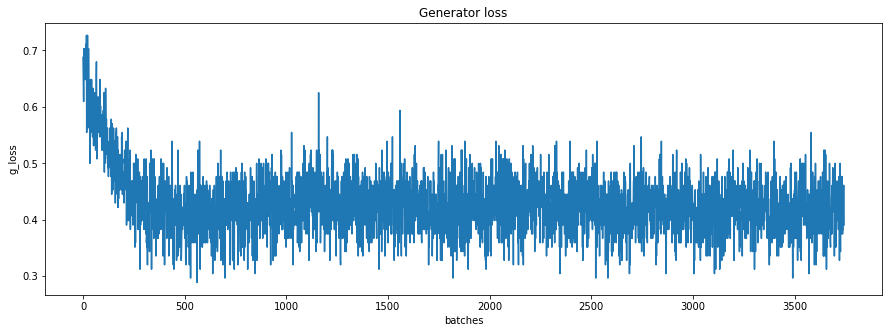

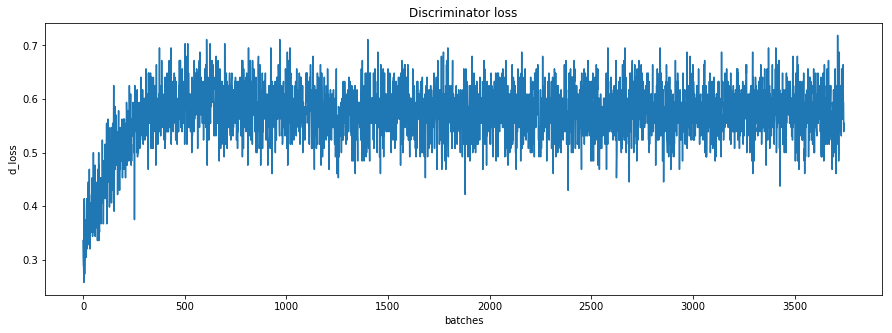


epoch: 9, batch: 467, g_loss: 0.764145, d_loss: 0.653004, g_accuracy: 0.351562, d_accuracy: 0.679688

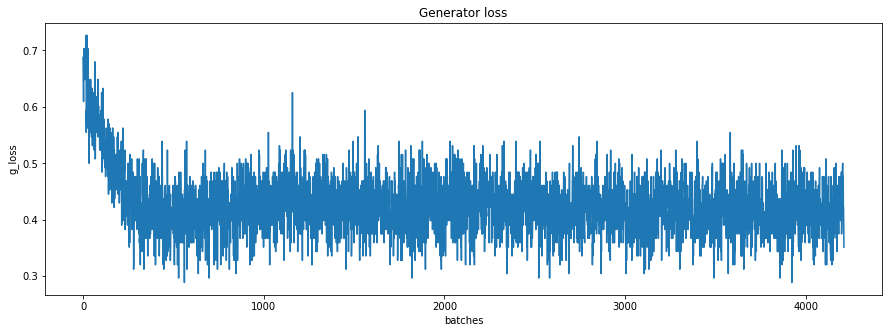

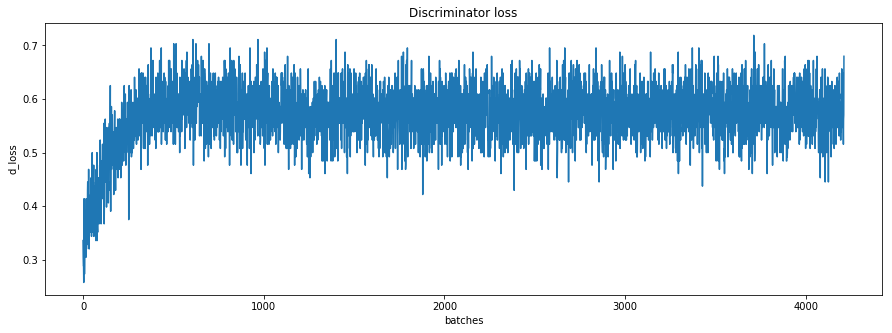


epoch: 10, batch: 467, g_loss: 0.780528, d_loss: 0.658987, g_accuracy: 0.343750, d_accuracy: 0.617188

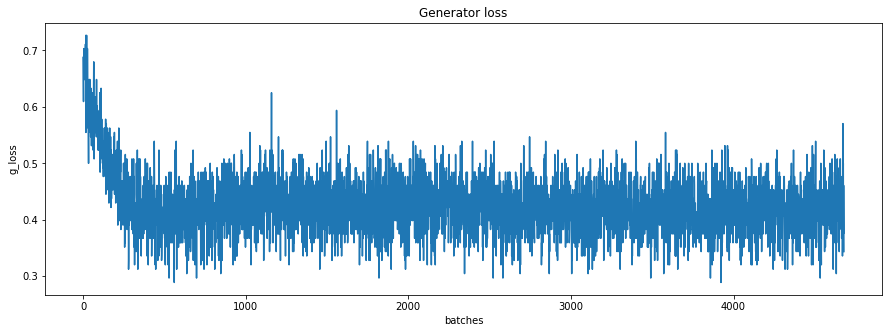

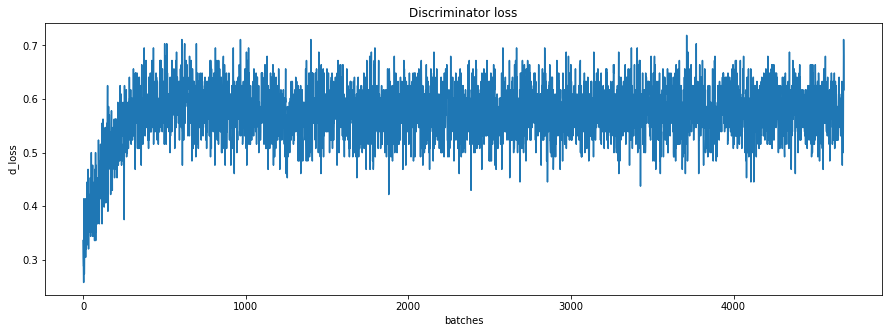


epoch: 11, batch: 467, g_loss: 0.745716, d_loss: 0.652734, g_accuracy: 0.468750, d_accuracy: 0.609375

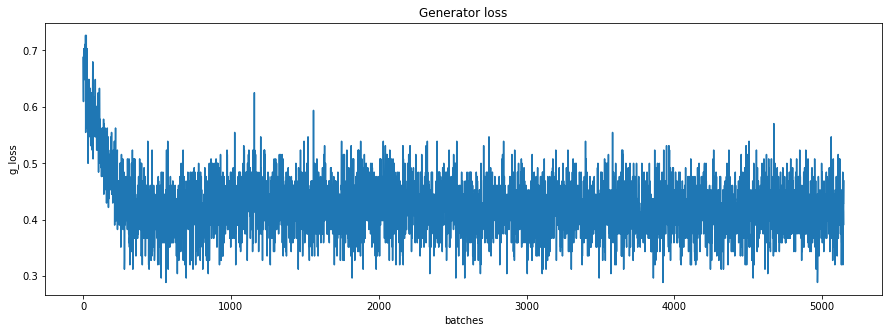

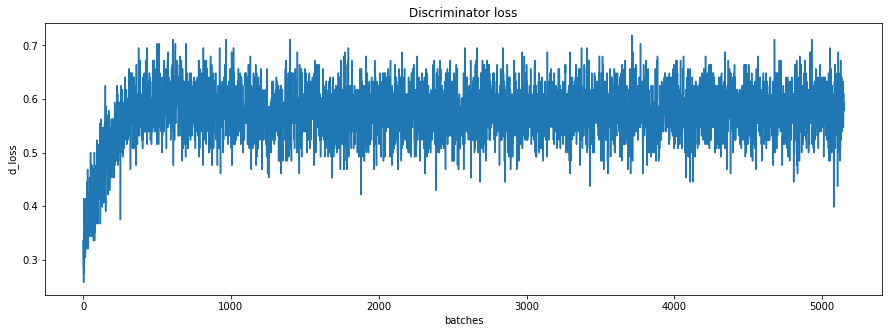


epoch: 12, batch: 467, g_loss: 0.740383, d_loss: 0.662082, g_accuracy: 0.468750, d_accuracy: 0.593750

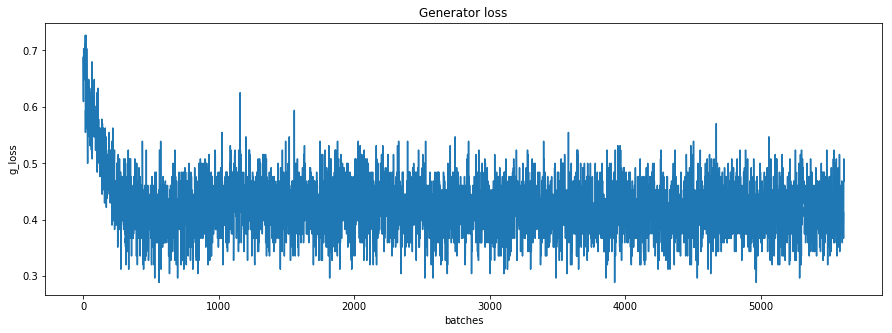

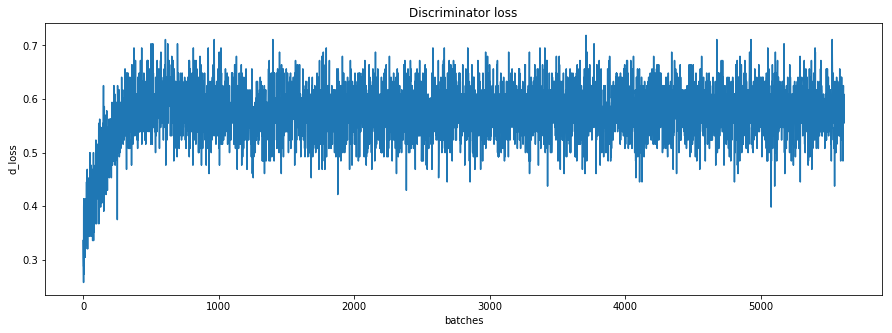


epoch: 13, batch: 467, g_loss: 0.748591, d_loss: 0.674572, g_accuracy: 0.460938, d_accuracy: 0.531250

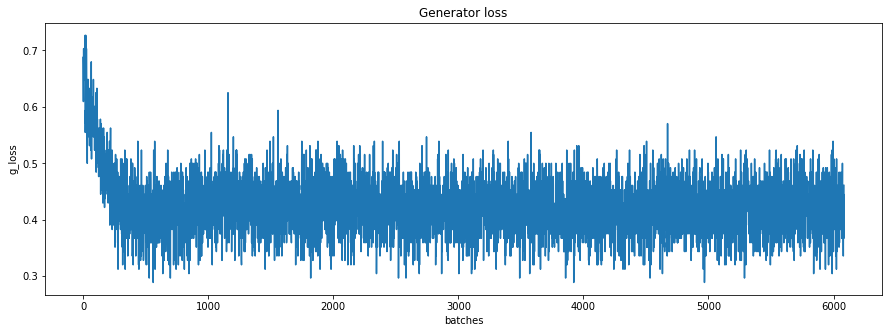

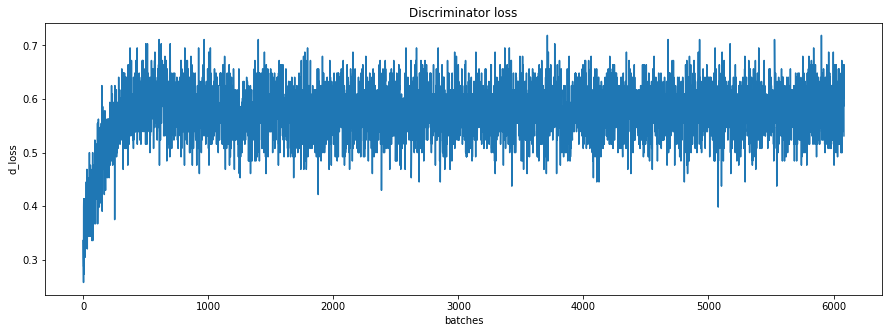


epoch: 14, batch: 467, g_loss: 0.745756, d_loss: 0.669068, g_accuracy: 0.429688, d_accuracy: 0.593750

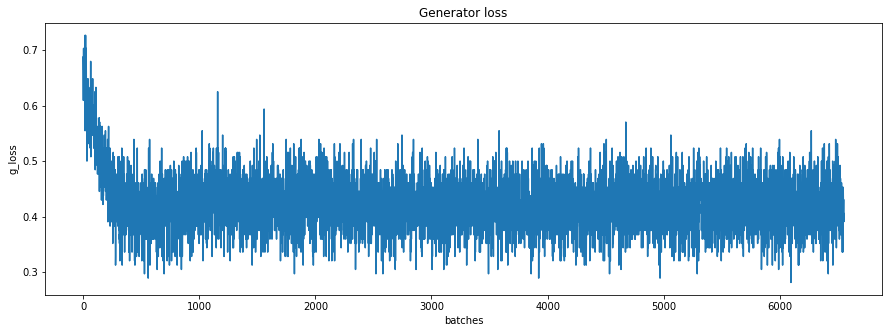

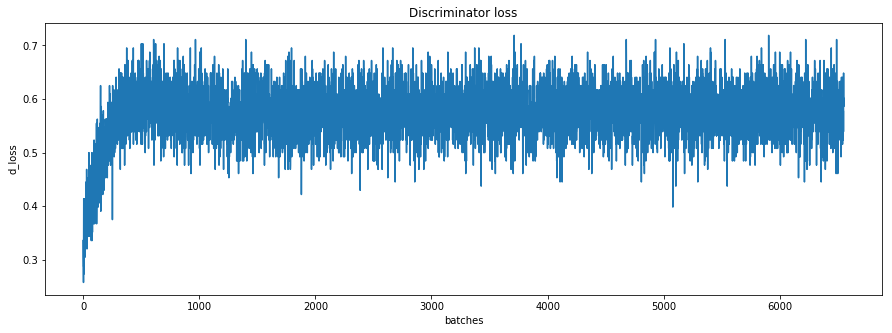


epoch: 15, batch: 467, g_loss: 0.777322, d_loss: 0.707207, g_accuracy: 0.375000, d_accuracy: 0.523438

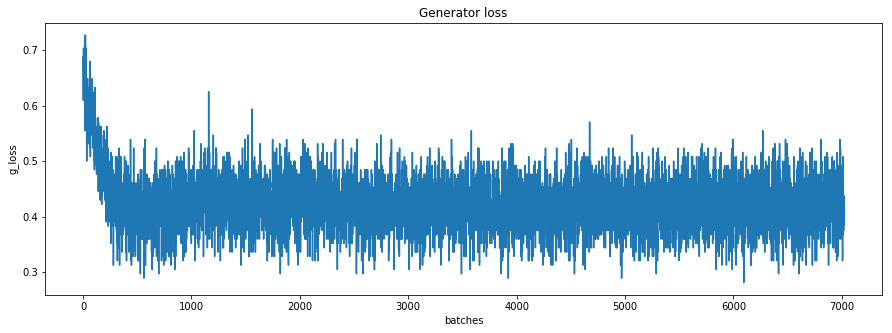

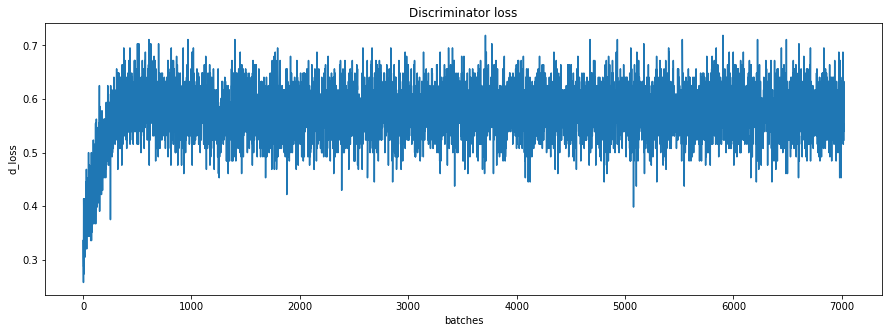


epoch: 16, batch: 467, g_loss: 0.749684, d_loss: 0.705435, g_accuracy: 0.398438, d_accuracy: 0.468750

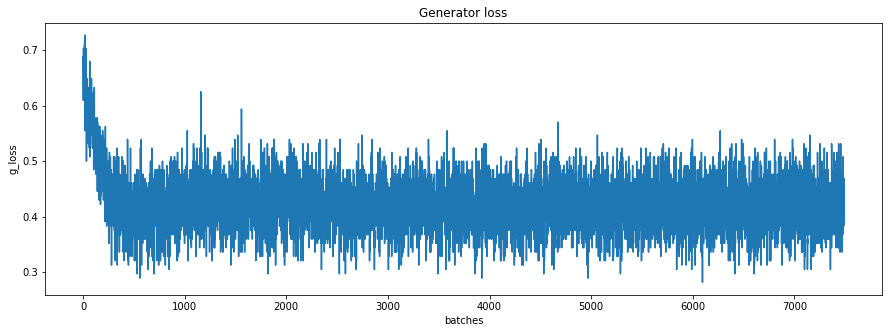

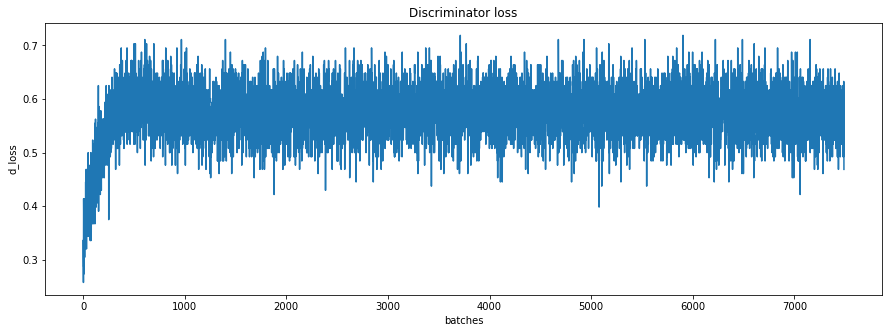


epoch: 17, batch: 467, g_loss: 0.741009, d_loss: 0.667844, g_accuracy: 0.414062, d_accuracy: 0.585938

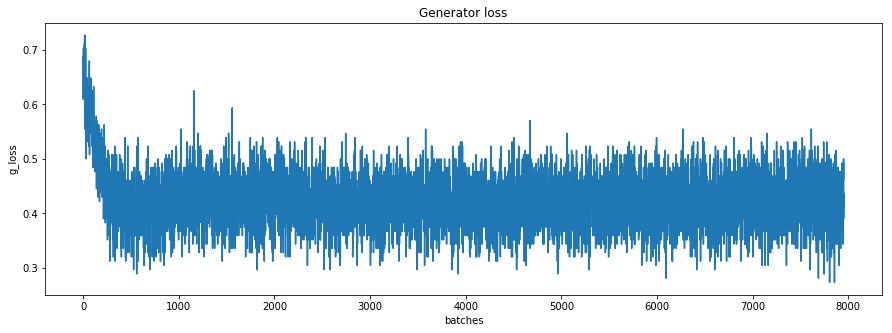

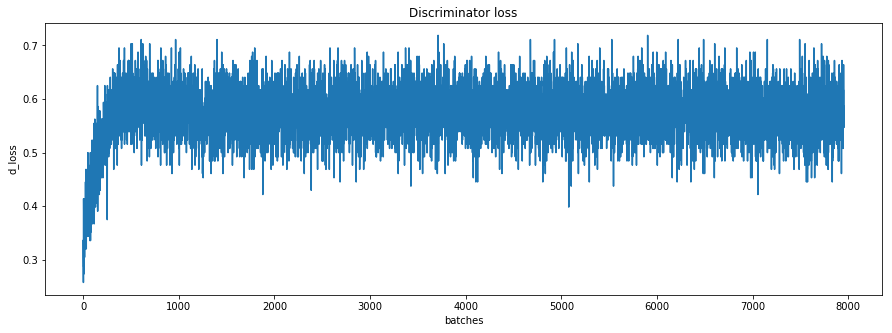


epoch: 18, batch: 467, g_loss: 0.748596, d_loss: 0.706532, g_accuracy: 0.421875, d_accuracy: 0.500000

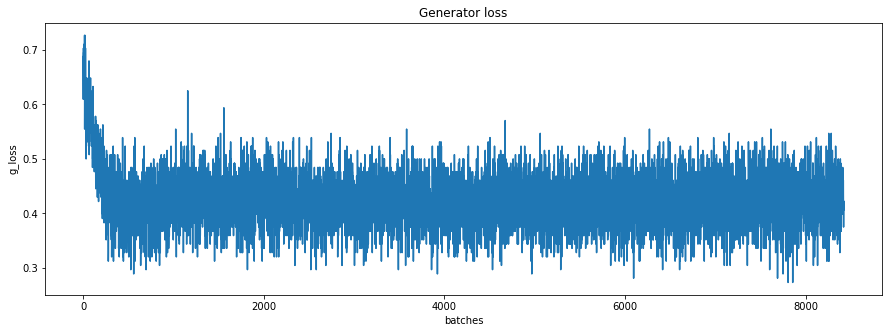

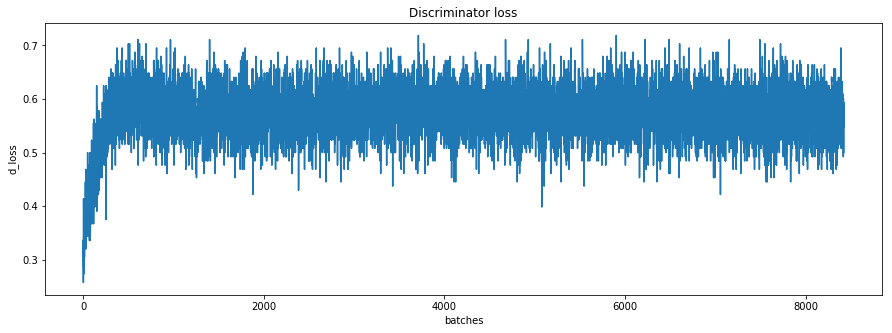


epoch: 19, batch: 467, g_loss: 0.731890, d_loss: 0.707312, g_accuracy: 0.453125, d_accuracy: 0.484375

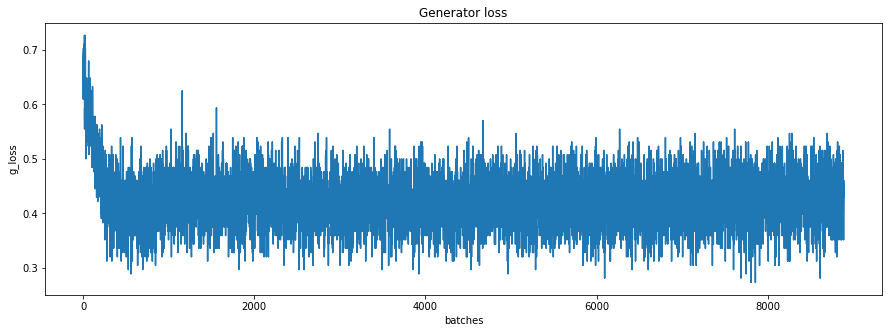

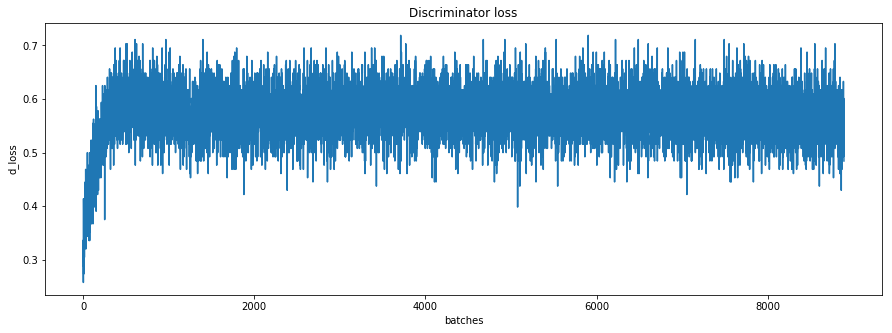


epoch: 20, batch: 467, g_loss: 0.716898, d_loss: 0.678789, g_accuracy: 0.476562, d_accuracy: 0.601562

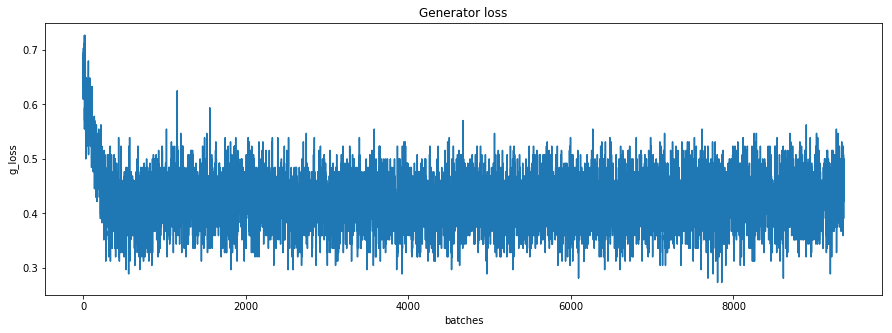

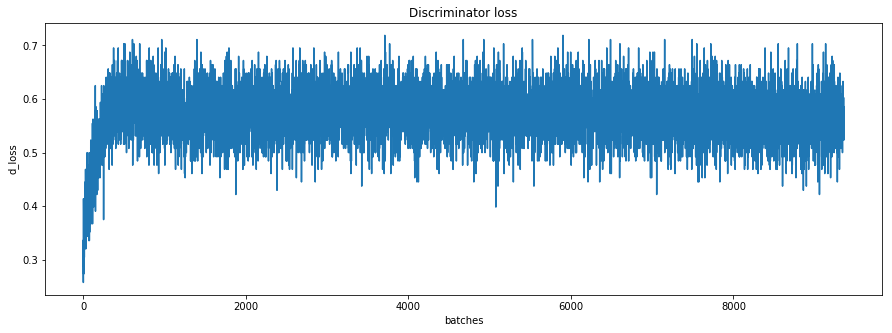


epoch: 21, batch: 467, g_loss: 0.728343, d_loss: 0.680414, g_accuracy: 0.460938, d_accuracy: 0.539062

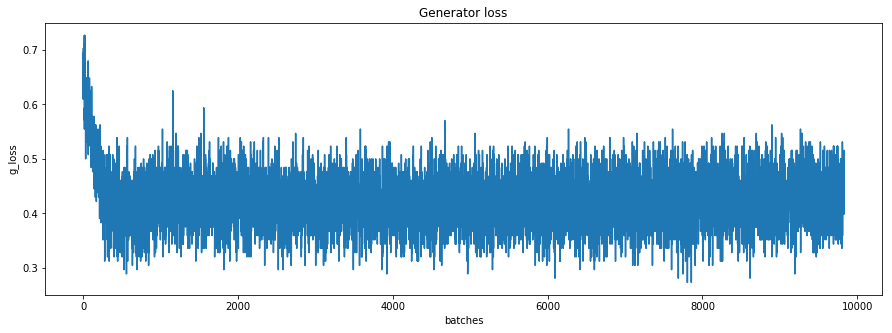

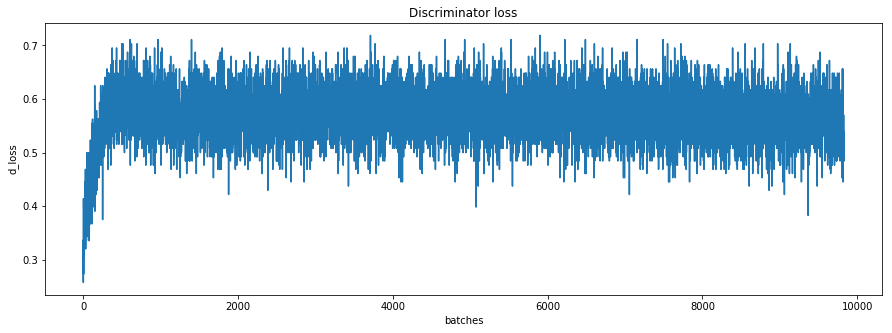


epoch: 22, batch: 467, g_loss: 0.720591, d_loss: 0.705859, g_accuracy: 0.476562, d_accuracy: 0.507812

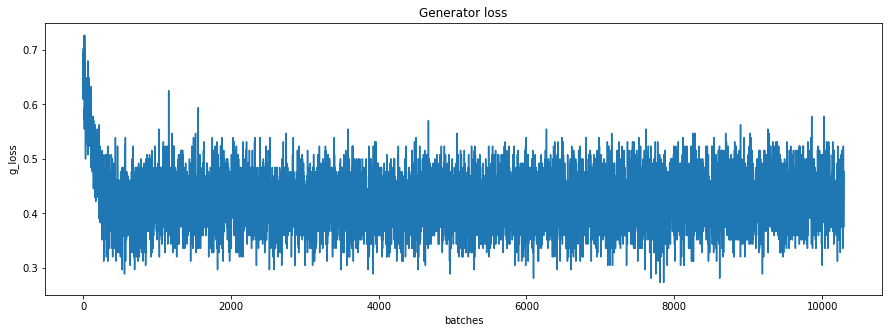

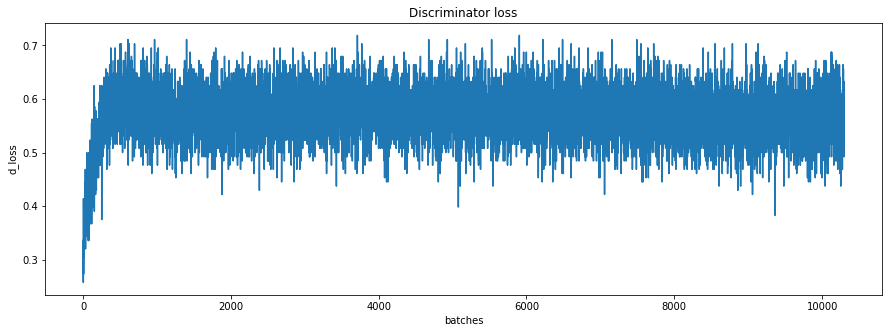


epoch: 23, batch: 467, g_loss: 0.721430, d_loss: 0.678173, g_accuracy: 0.492188, d_accuracy: 0.531250

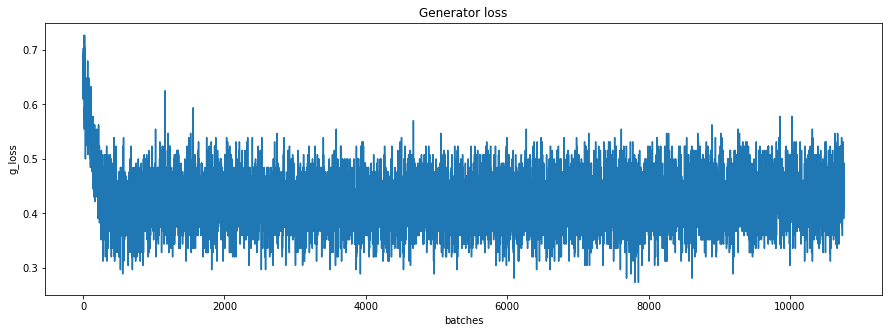

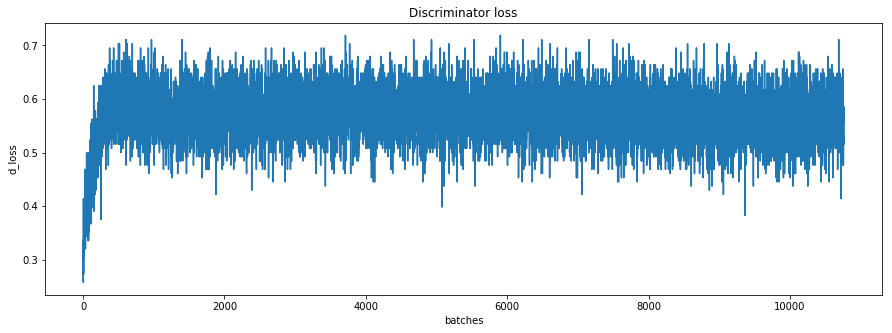


epoch: 24, batch: 467, g_loss: 0.734376, d_loss: 0.651055, g_accuracy: 0.437500, d_accuracy: 0.664062

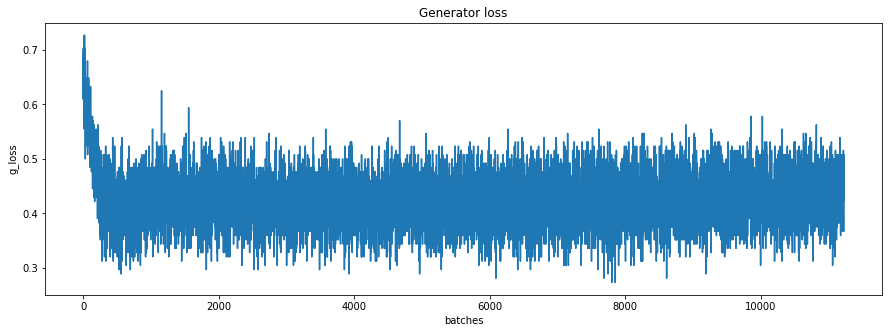

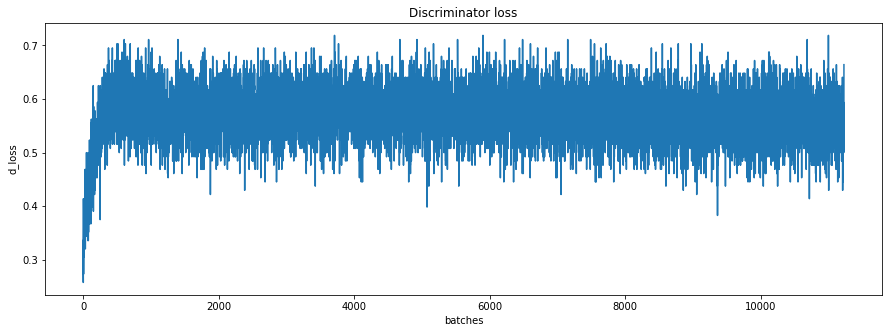


epoch: 25, batch: 467, g_loss: 0.737214, d_loss: 0.677447, g_accuracy: 0.359375, d_accuracy: 0.570312

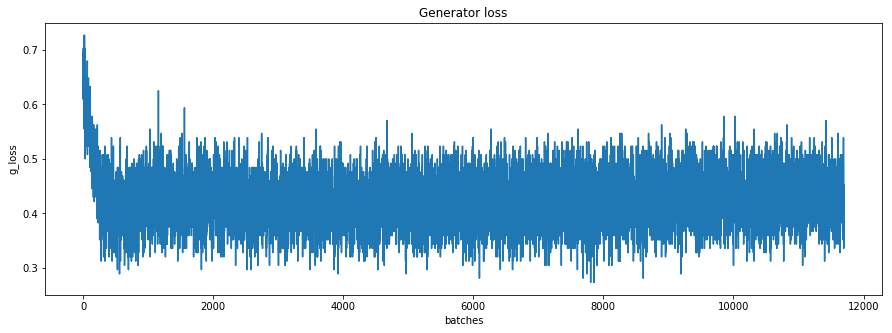

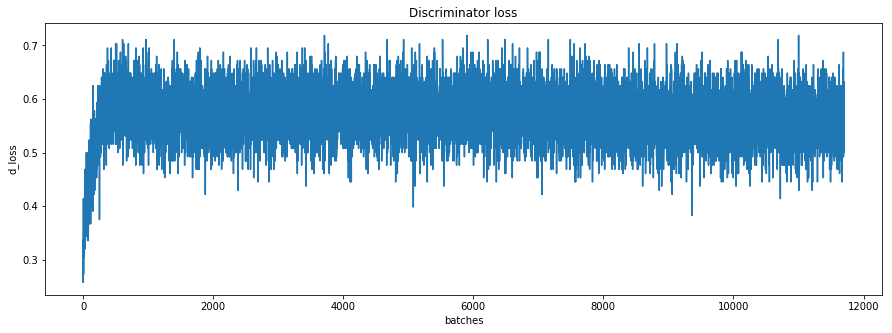


epoch: 26, batch: 467, g_loss: 0.726967, d_loss: 0.666883, g_accuracy: 0.406250, d_accuracy: 0.554688

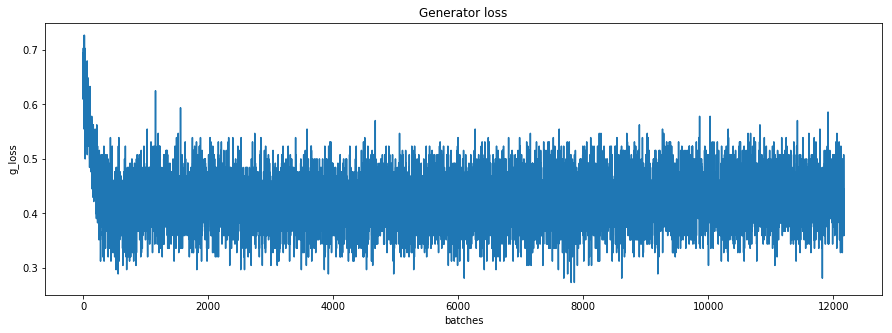

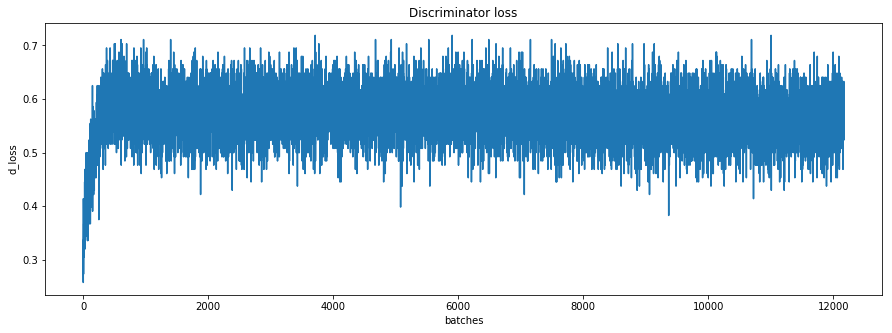


epoch: 27, batch: 467, g_loss: 0.739680, d_loss: 0.684722, g_accuracy: 0.406250, d_accuracy: 0.578125

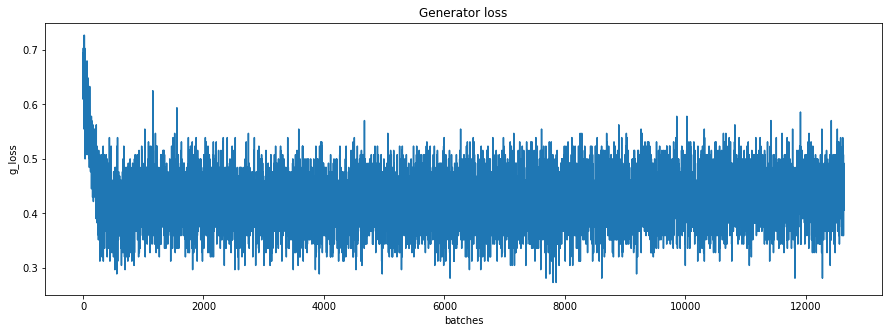

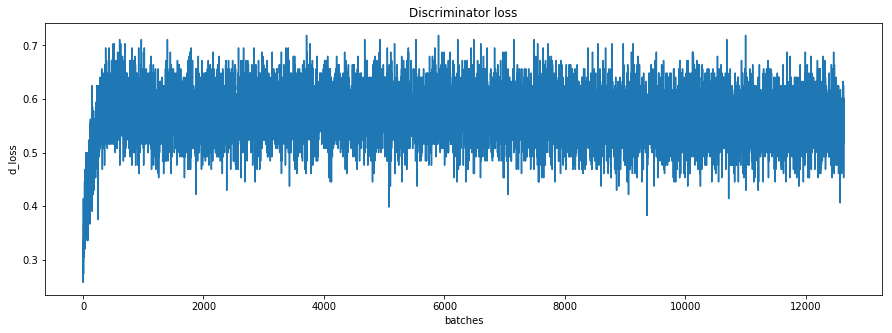


epoch: 28, batch: 467, g_loss: 0.743812, d_loss: 0.663231, g_accuracy: 0.390625, d_accuracy: 0.585938

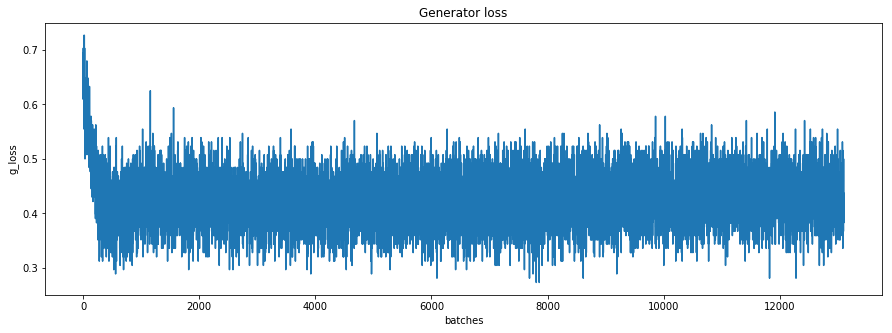

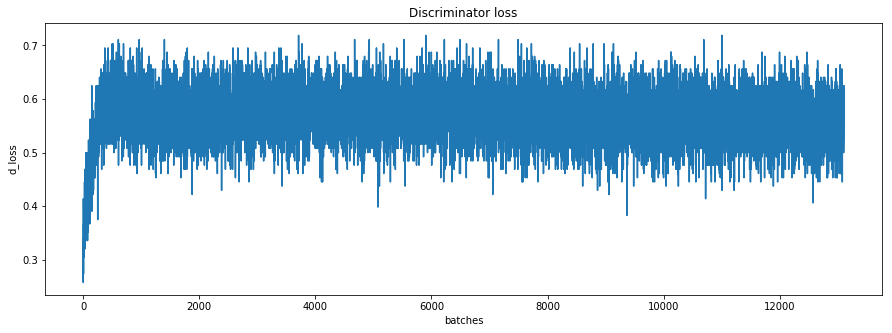


epoch: 29, batch: 467, g_loss: 0.734528, d_loss: 0.649136, g_accuracy: 0.429688, d_accuracy: 0.640625

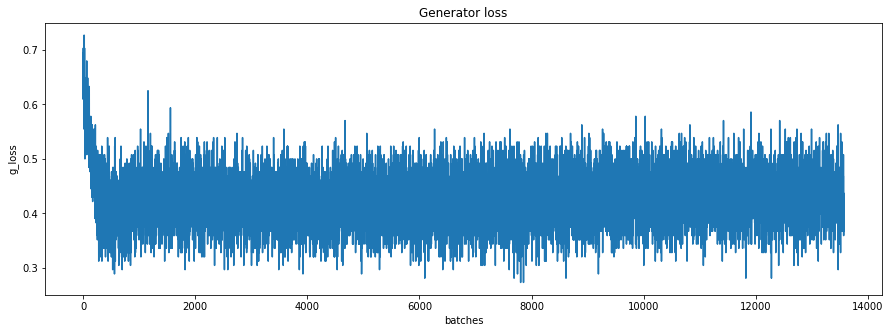

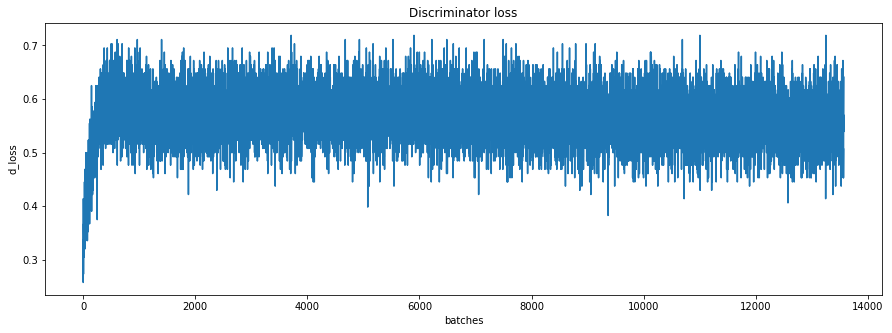


epoch: 30, batch: 467, g_loss: 0.728678, d_loss: 0.698331, g_accuracy: 0.382812, d_accuracy: 0.484375

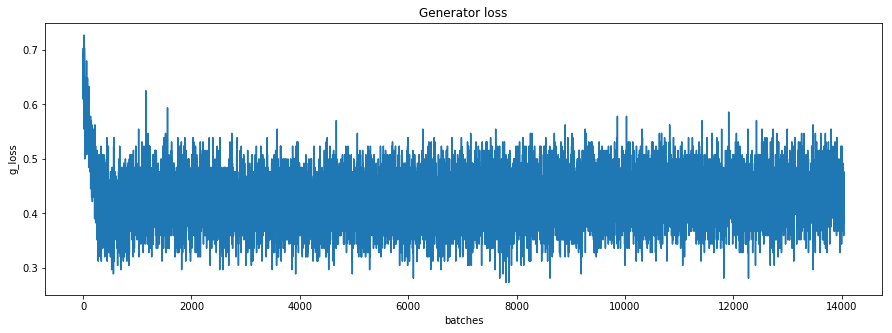

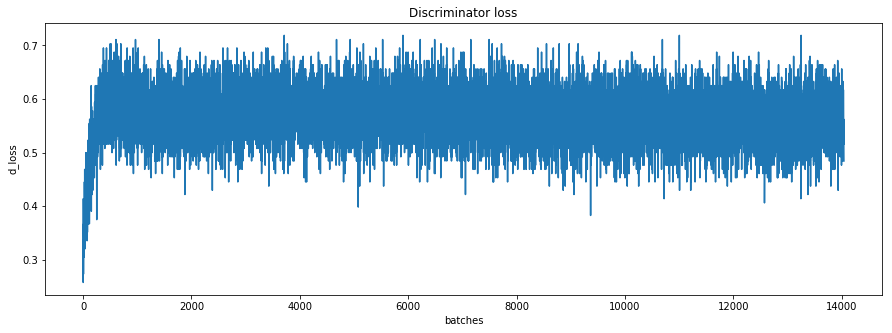


epoch: 31, batch: 467, g_loss: 0.734157, d_loss: 0.685125, g_accuracy: 0.445312, d_accuracy: 0.546875

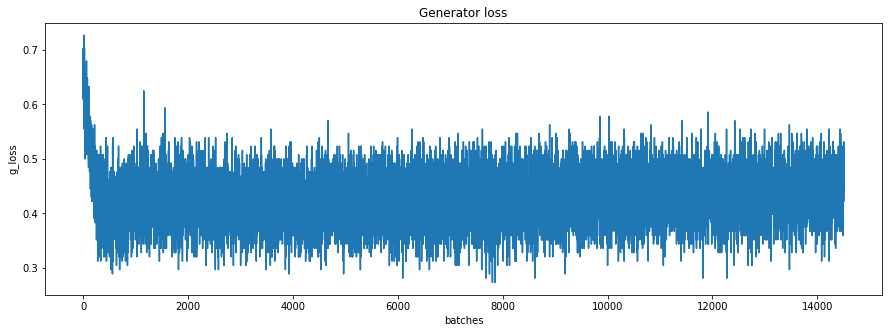

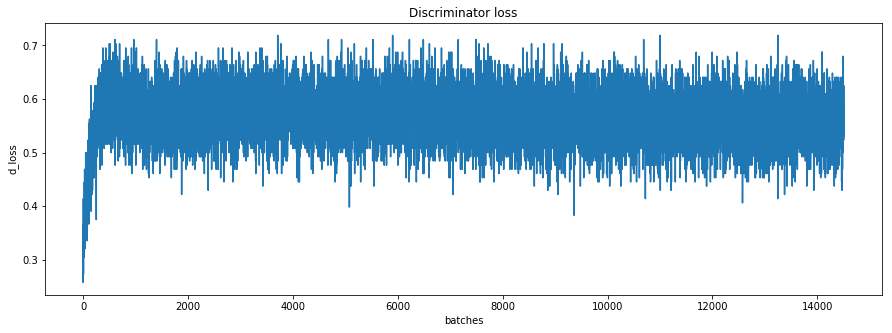


epoch: 32, batch: 467, g_loss: 0.731685, d_loss: 0.685045, g_accuracy: 0.429688, d_accuracy: 0.601562

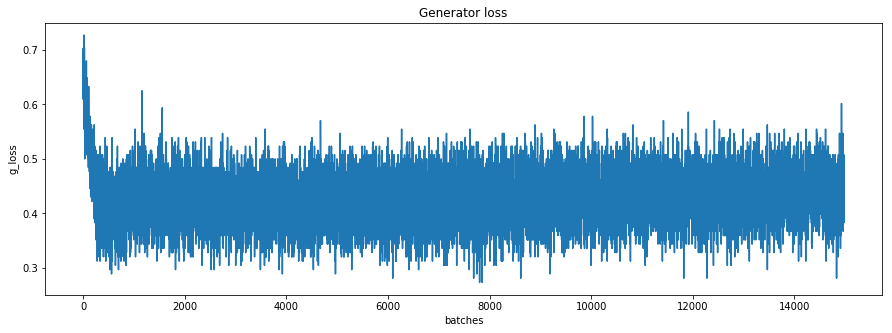

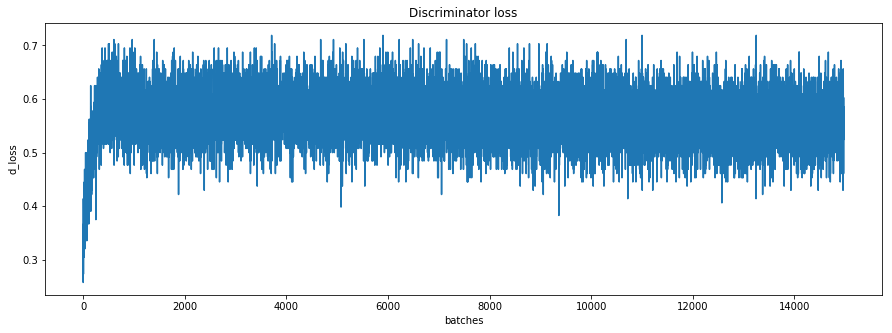


epoch: 33, batch: 467, g_loss: 0.726009, d_loss: 0.674892, g_accuracy: 0.468750, d_accuracy: 0.601562

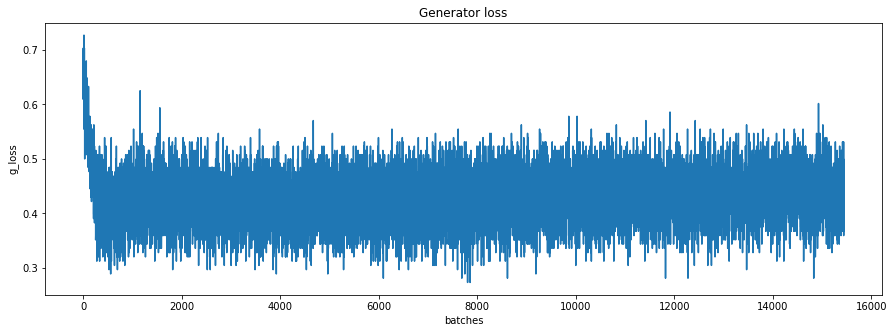

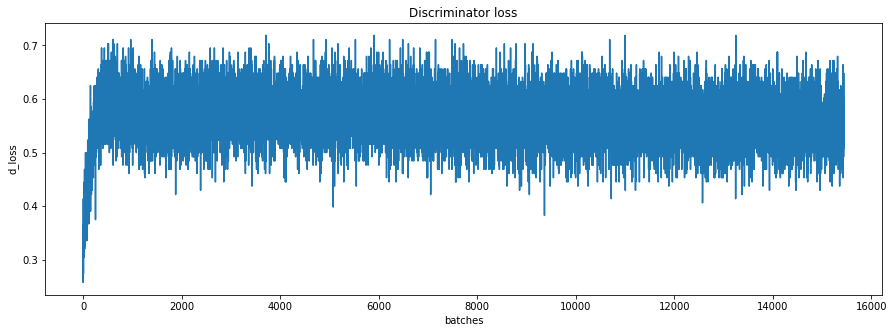


epoch: 34, batch: 467, g_loss: 0.735620, d_loss: 0.672548, g_accuracy: 0.398438, d_accuracy: 0.625000

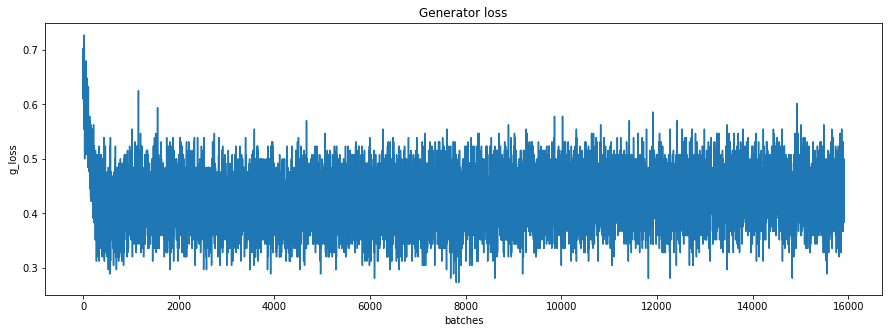

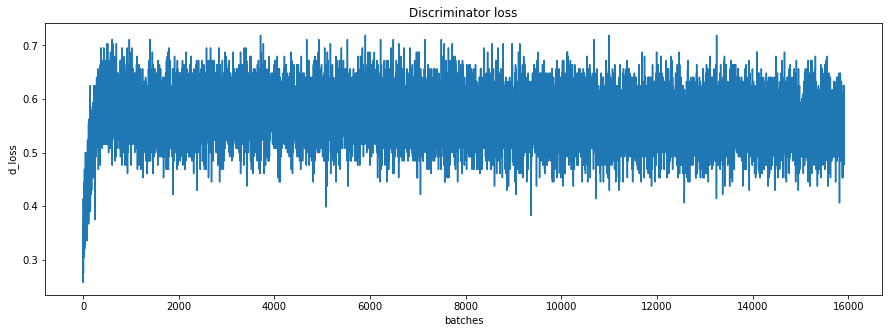


epoch: 35, batch: 467, g_loss: 0.710835, d_loss: 0.678228, g_accuracy: 0.507812, d_accuracy: 0.554688

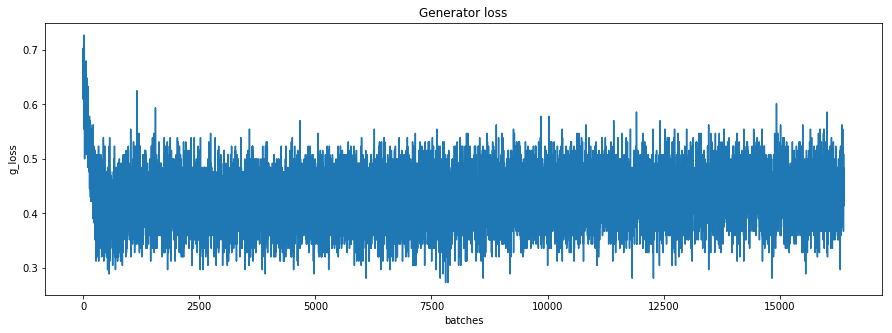

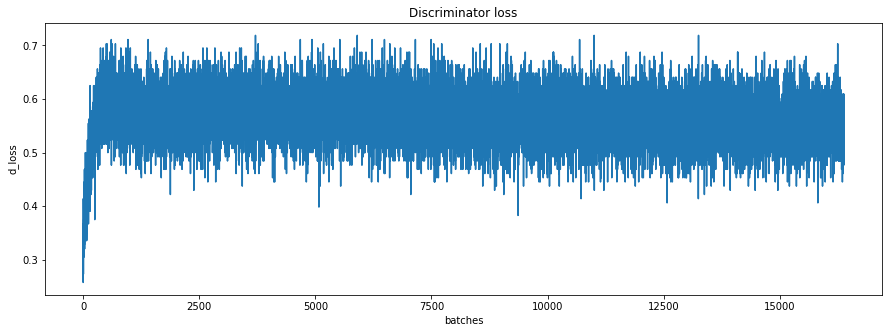


epoch: 44, batch: 467, g_loss: 0.711690, d_loss: 0.692360, g_accuracy: 0.453125, d_accuracy: 0.507812

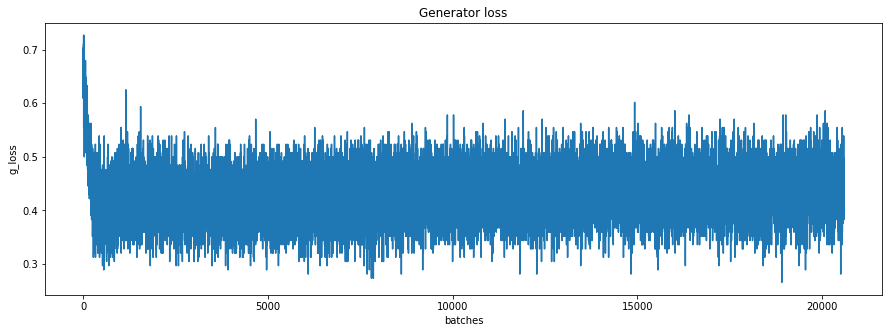

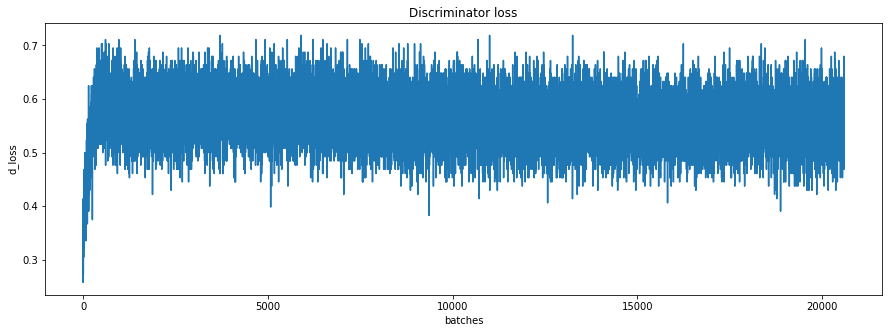


epoch: 45, batch: 467, g_loss: 0.719443, d_loss: 0.674611, g_accuracy: 0.484375, d_accuracy: 0.593750

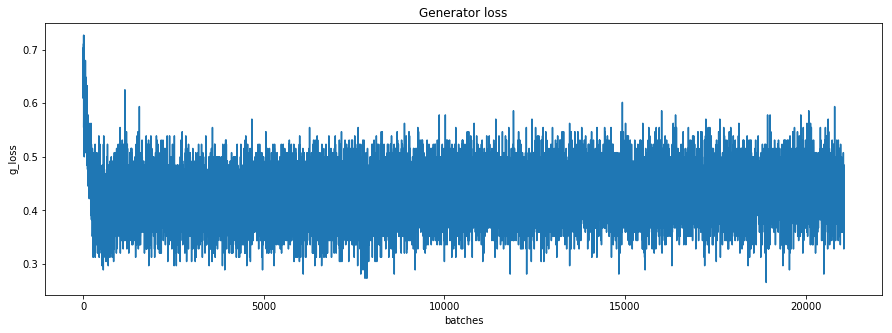

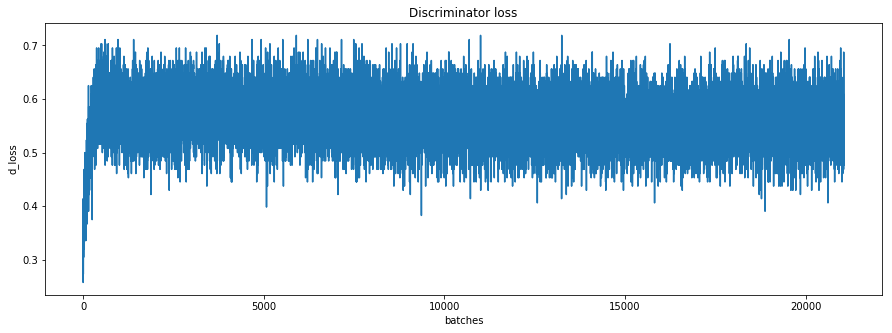


epoch: 46, batch: 467, g_loss: 0.747368, d_loss: 0.668418, g_accuracy: 0.367188, d_accuracy: 0.593750

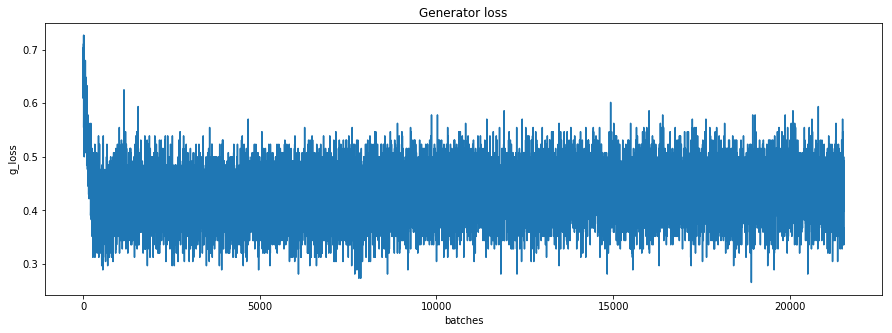

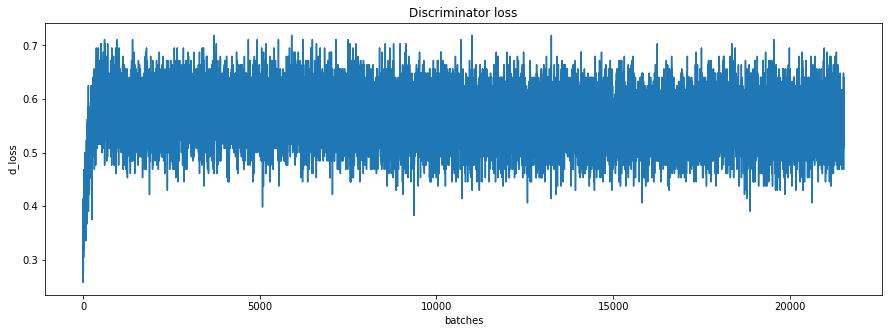


epoch: 47, batch: 467, g_loss: 0.751102, d_loss: 0.691418, g_accuracy: 0.429688, d_accuracy: 0.500000

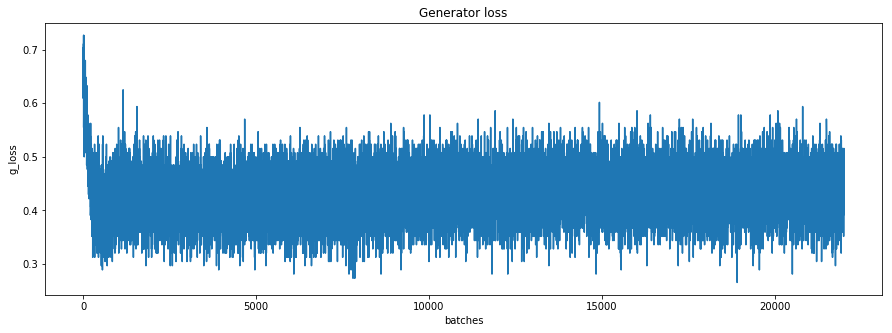

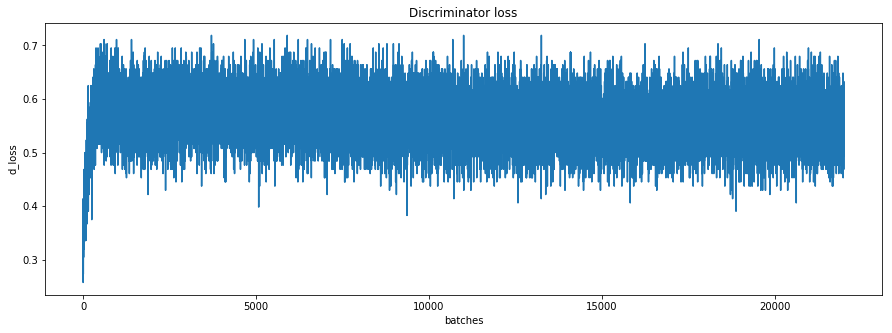


epoch: 48, batch: 467, g_loss: 0.731003, d_loss: 0.682176, g_accuracy: 0.500000, d_accuracy: 0.531250

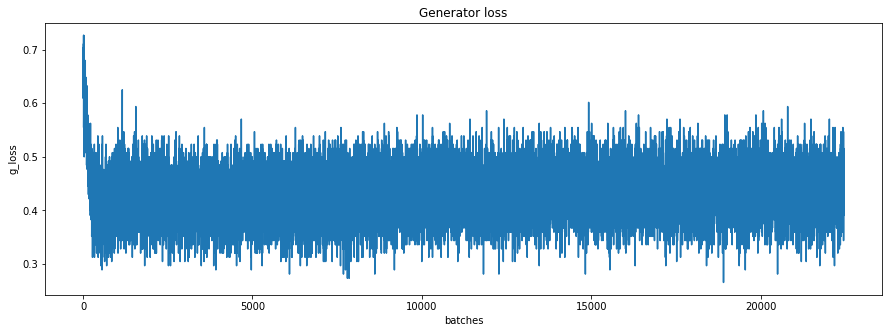

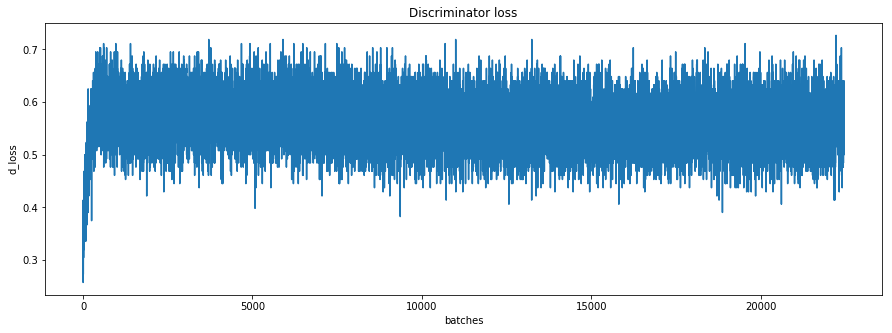


epoch: 49, batch: 467, g_loss: 0.727133, d_loss: 0.666528, g_accuracy: 0.414062, d_accuracy: 0.601562

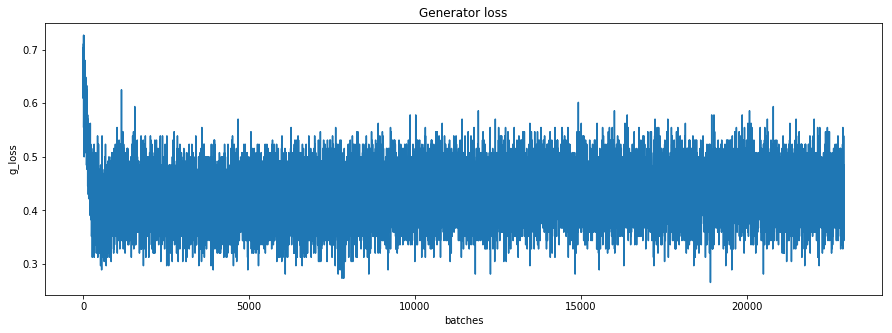

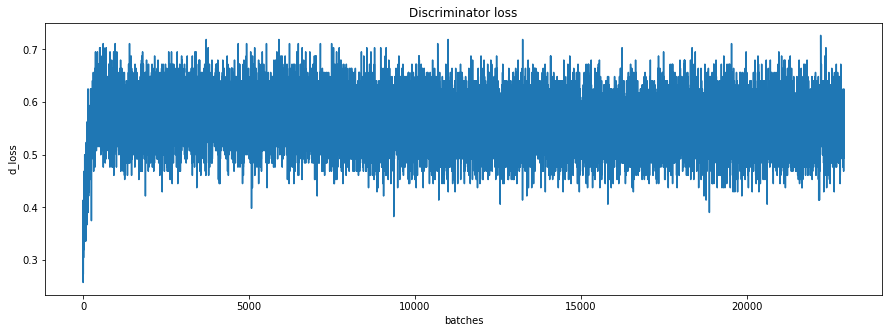


epoch: 50, batch: 467, g_loss: 0.735609, d_loss: 0.684277, g_accuracy: 0.429688, d_accuracy: 0.539062

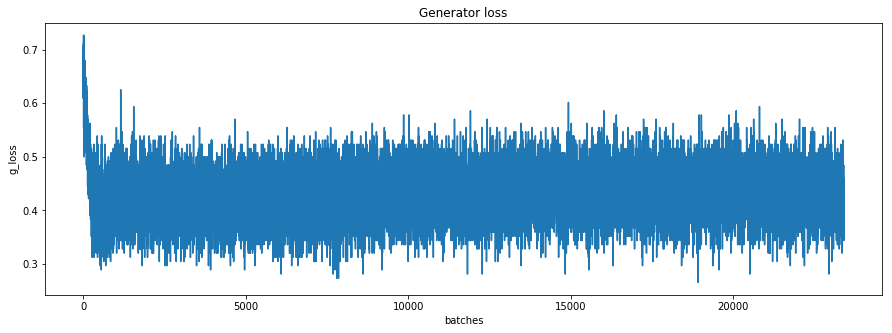

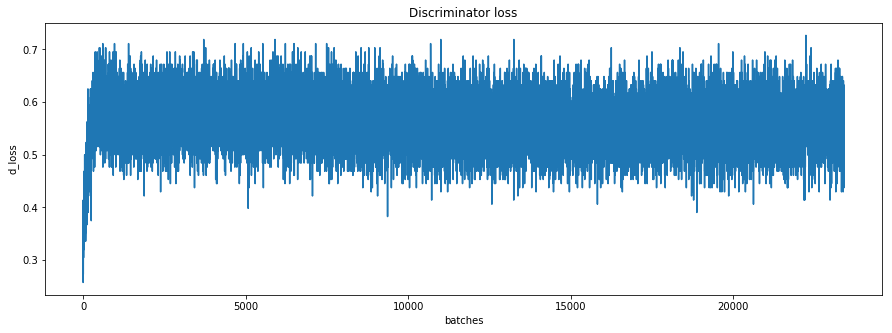


epoch: 51, batch: 467, g_loss: 0.725433, d_loss: 0.672441, g_accuracy: 0.453125, d_accuracy: 0.546875

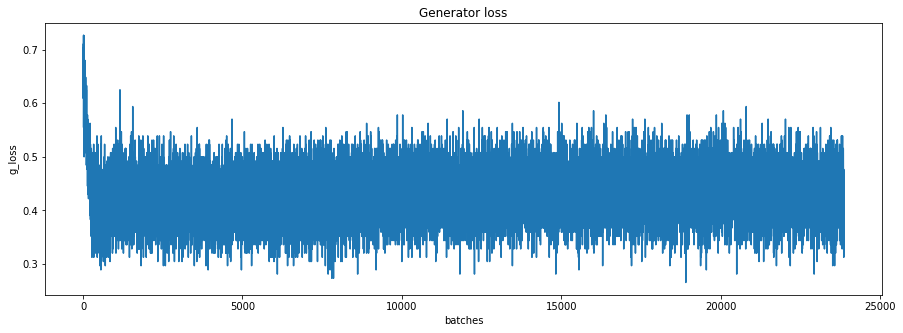

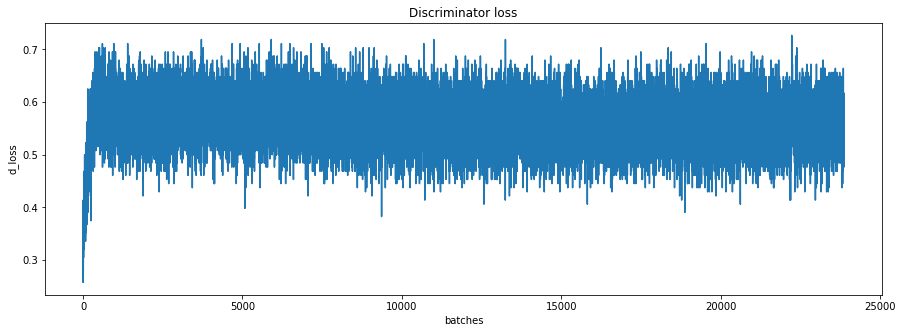


epoch: 52, batch: 467, g_loss: 0.708812, d_loss: 0.687586, g_accuracy: 0.515625, d_accuracy: 0.570312

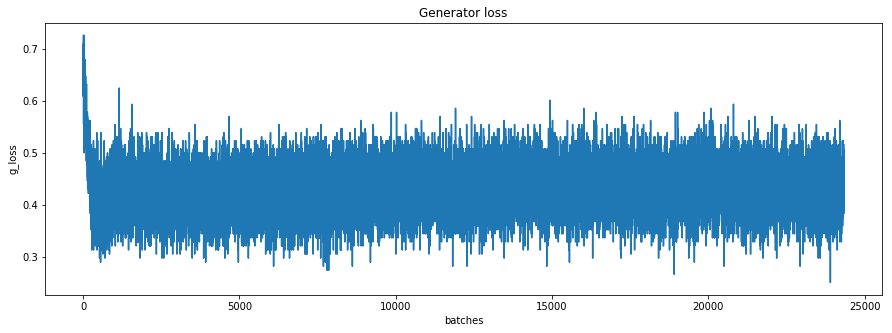

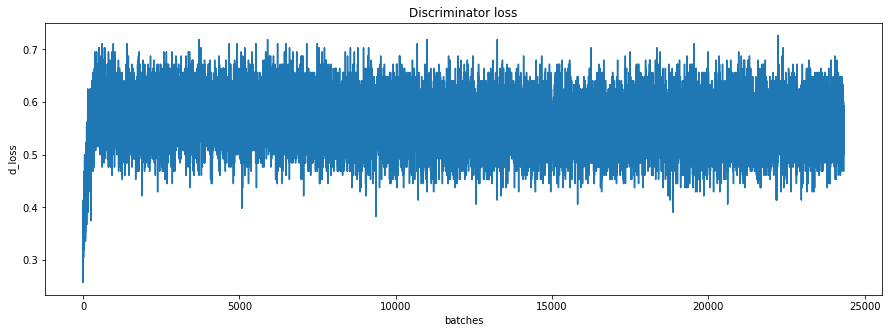


epoch: 53, batch: 467, g_loss: 0.748441, d_loss: 0.670645, g_accuracy: 0.406250, d_accuracy: 0.585938

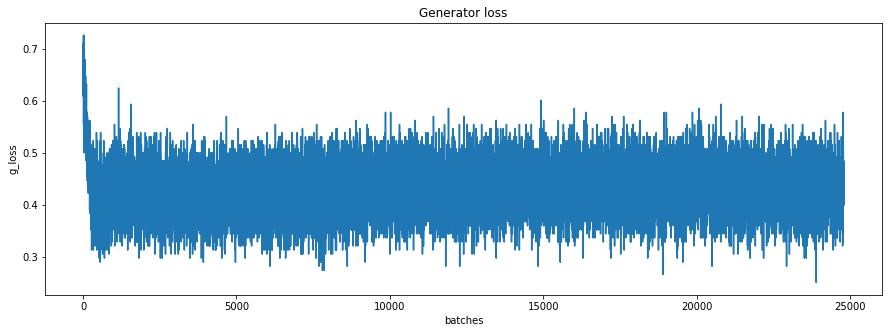

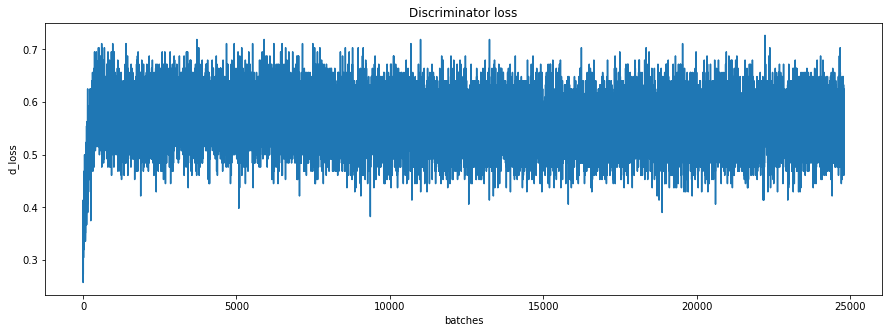


epoch: 54, batch: 467, g_loss: 0.740505, d_loss: 0.691101, g_accuracy: 0.445312, d_accuracy: 0.515625

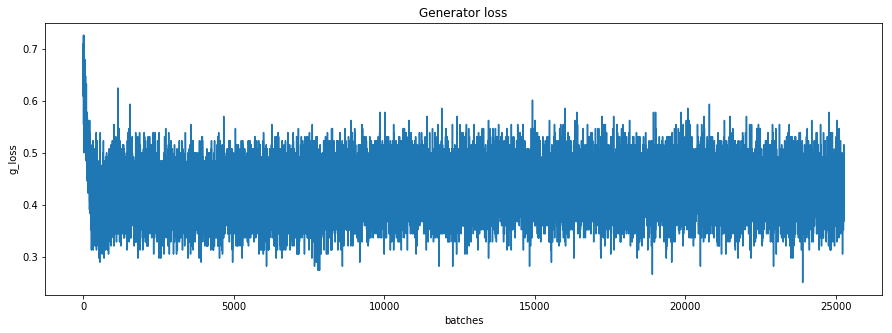

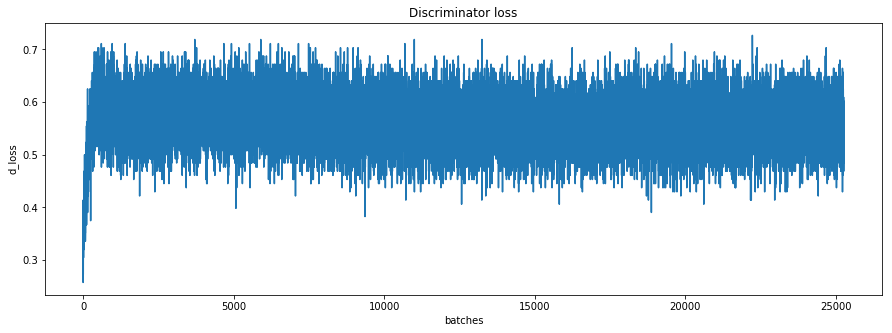


epoch: 55, batch: 467, g_loss: 0.724792, d_loss: 0.689165, g_accuracy: 0.437500, d_accuracy: 0.546875

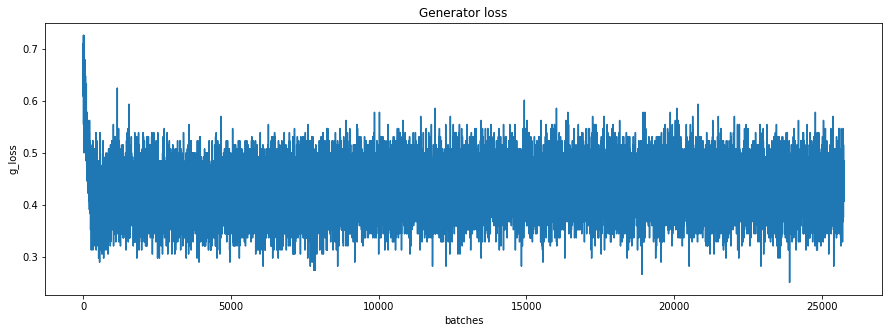

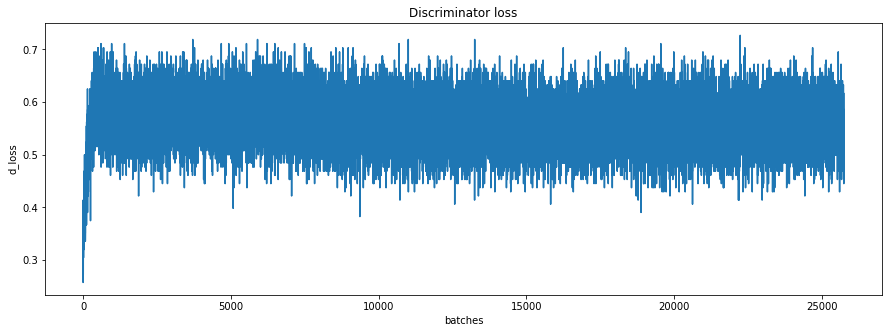


epoch: 56, batch: 467, g_loss: 0.727902, d_loss: 0.686509, g_accuracy: 0.445312, d_accuracy: 0.554688

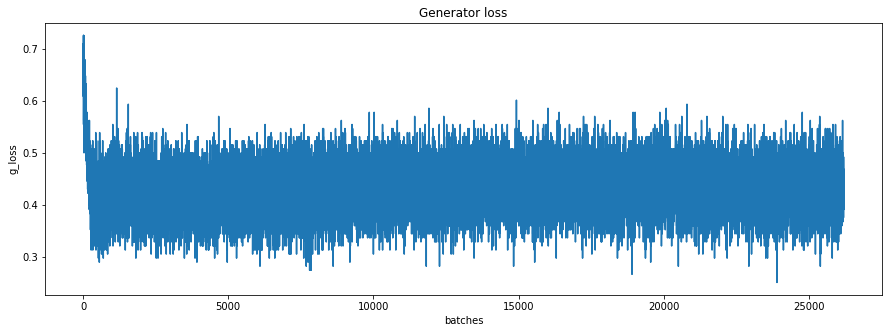

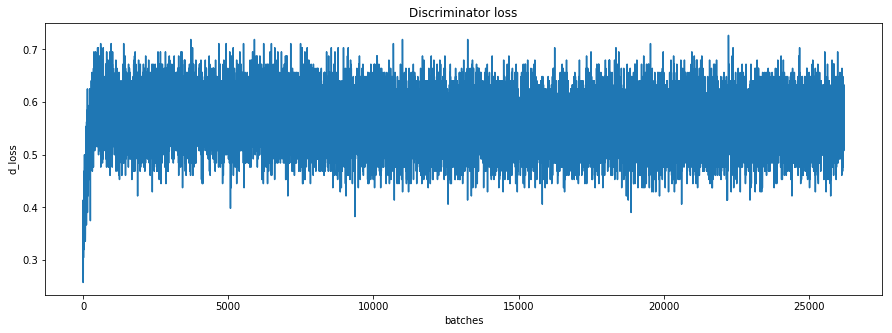


epoch: 57, batch: 467, g_loss: 0.696269, d_loss: 0.670875, g_accuracy: 0.515625, d_accuracy: 0.578125

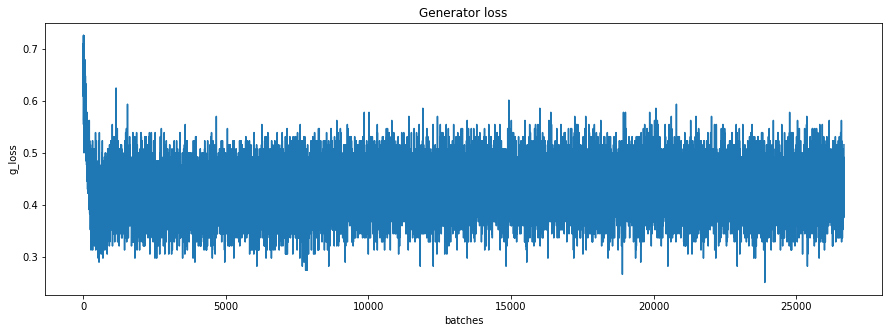

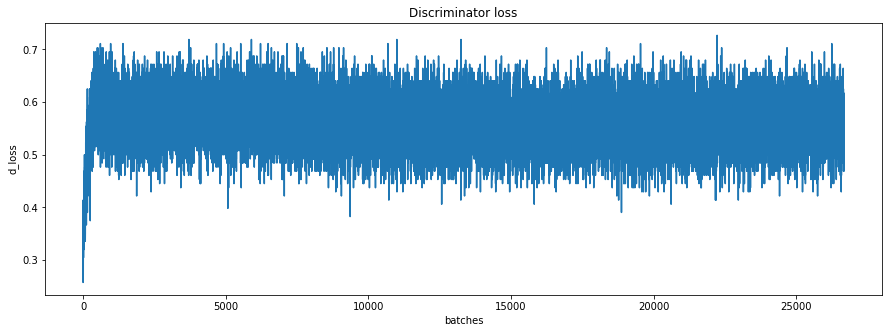


epoch: 58, batch: 467, g_loss: 0.739051, d_loss: 0.694791, g_accuracy: 0.390625, d_accuracy: 0.531250

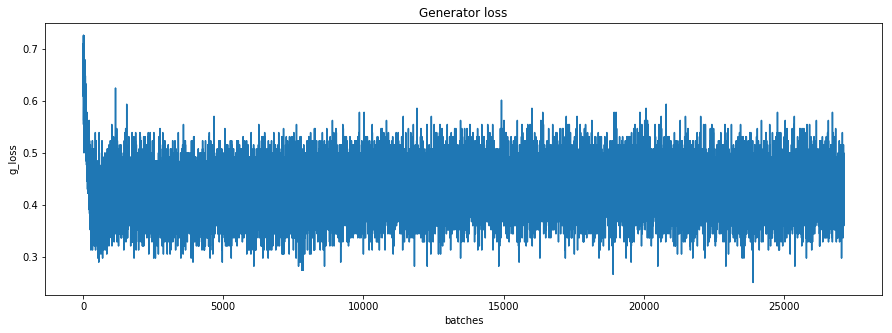

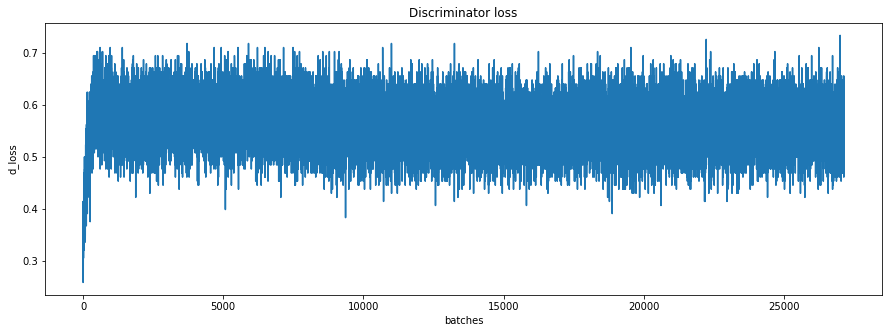


epoch: 59, batch: 467, g_loss: 0.755446, d_loss: 0.671154, g_accuracy: 0.390625, d_accuracy: 0.601562

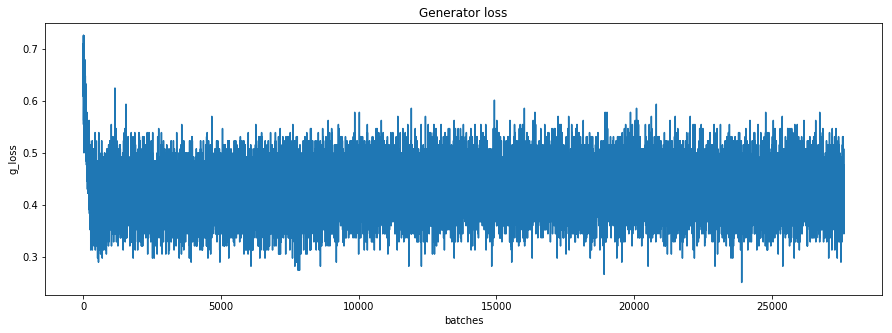

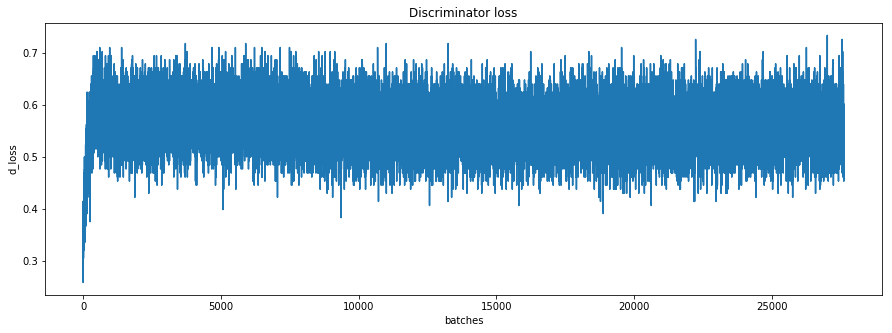


epoch: 60, batch: 467, g_loss: 0.742039, d_loss: 0.686784, g_accuracy: 0.382812, d_accuracy: 0.601562

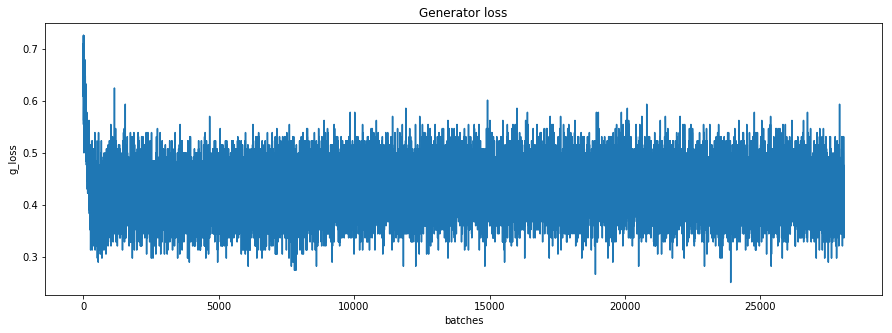

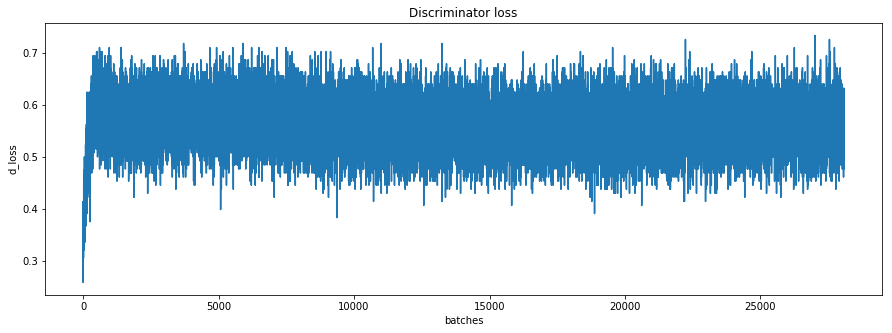

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)

BATCH_SIZE = 128
NUM_EPOCH = 60
LR = 0.0002  # initial learning rate
B1 = 0.5  # momentum term
GENERATED_IMAGE_PATH = 'images/'
GENERATED_MODEL_PATH = 'models/'

#create 2 lists of discriminator loss and generator loss to plot the graph
g_loss_list = []
d_loss_list = []

def train():
    (X_train, y_train), (_, _) = mnist.load_data()
    # normalize images
    X_train = (X_train.astype(np.float32) - 127.5)/127.5
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

    # build GAN
    g = generator()
    d = discriminator()

    opt = Adam(lr=LR,beta_1=B1)                     #lr is learning rate given to th optimizer, beta is always between 0 & 1
    d.trainable = True
    d.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)
    d.trainable = False
    dcgan = Sequential([g, d])
    opt= Adam(lr=LR,beta_1=B1)
    dcgan.compile(loss='binary_crossentropy',
                  metrics=['accuracy'],
                  optimizer=opt)

    num_batches = int(X_train.shape[0] / BATCH_SIZE)
    # create directory
    if not os.path.exists(GENERATED_IMAGE_PATH):
        os.mkdir(GENERATED_IMAGE_PATH)
    if not os.path.exists(GENERATED_MODEL_PATH):
        os.mkdir(GENERATED_MODEL_PATH)

    print("-------------------")
    print("Total epoch:", NUM_EPOCH, "Number of batches:", num_batches)
    print("-------------------")
    z_pred = np.array([np.random.uniform(-1,1,100) for _ in range(49)]) #array to hold individual digit
    y_g = [1]*BATCH_SIZE                                                #input image from g to d
    y_d_true = [1]*BATCH_SIZE                                           #classified as 1 if image is real  
    y_d_gen = [0]*BATCH_SIZE                                            #classified as 0 if image is fake
    for epoch in list(map(lambda x: x+1,range(NUM_EPOCH))):
        for index in range(num_batches):
            X_d_true = X_train[index*BATCH_SIZE:(index+1)*BATCH_SIZE]                 #discriminator predicting
            X_g = np.array([np.random.normal(0,0.5,100) for _ in range(BATCH_SIZE)])  #and suggesting improvements
            X_d_gen = g.predict(X_g, verbose=0)                                       #to generator

            # train discriminator
            d_loss = d.train_on_batch(X_d_true, y_d_true)
            d_loss = d.train_on_batch(X_d_gen, y_d_gen)
            # train generator
            g_loss = dcgan.train_on_batch(X_g, y_g)
            show_progress(epoch,index,g_loss[0],d_loss[0],g_loss[1],d_loss[1]) #Prints progress to output screen
            #Adding the losses into lists for plotting graph
            d_loss_list.append(d_loss[1])
            g_loss_list.append(g_loss[1])

        # save generated images
        image = combine_images(g.predict(z_pred))                 #passing values to create an output image which contains 7*7 digits
        image = image*127.5 + 127.5                               #scaling back to original form
        Image.fromarray(image.astype(np.uint8))\
            .save(GENERATED_IMAGE_PATH+"%03depoch.png" % (epoch))
        
        #Plot the garph of generator loss vs number of batches
        plt.plot(g_loss_list,label="Generator loss")
        plt.title('Generator loss')
        plt.ylabel('g_loss')
        plt.xlabel('batches')
        plt.show()
        
        #Plot the garph of discriminator loss vs number of batches
        plt.plot(d_loss_list,label="Discriminator loss")
        plt.title('Discriminator loss')
        plt.ylabel('d_loss')
        plt.xlabel('batches')
        plt.show()

        print()

if __name__ == '__main__':
    train()

#### MIT License

Copyright 2018 Amogh Chakkarwar, Mohit Arya, Shashank Jain

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

##### Creative Commons License
<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.